## About the Company

Sterling E-Commerce is an online shopping destination with a mission to provide the best shopping experience. They offer a wide selection of products across various categories such as health & sports, fashion, computing, entertainment, mobiles & tablets, appliances, beauty & grooming, home & living, soghaat, school & education, books, and more. 

## Problem Overview
Sterling E-Commerce needs to gain insights into their business and improve efficiency. They want to identify patterns and trends in customer behaviour to inform decisions and improve their product offering, operations and customer experience.

The data includes information about customers such as their full name, gender, username, customer ID, and date of first order. It also includes information about goods such as category, item ID, quantity ordered, and total amount paid. Additionally, it covers the customer's location, including city, county, region, state, place name, and zip code.


In [250]:
#importing useful libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings 
warnings.filterwarnings('ignore') 
from collections import Counter

### Loading the Data

In [251]:
#loading in the E-Commerce Dataset
data = pd.read_csv(r"C:\Users\kez4r\Documents\FSDS Assignments\Starling E-commerce\Sterling E-Commerce Data - Online Sales Data.csv")
data.head(5)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


## Features in the data and their meaning
- Category – The category of goods
- City – The city where customers are ordering from
- County – The county where customers are ordering from 
- Cust Id – Customer ID
- Customer Since – The date when the customer first order. 
- Date of Order – The date when the customer placed an order. 
- Full Name – Customer full name
- Gender – (Male, Female)
- Item Id – Item ID
- Order Id – Order ID
- Payment Method – The payment platform the customer used 
- Place Name – The exact location where the customers are ordering from 
- Ref Num – Reference Number
- Region – The region where the customer are ordering from 
- State - The state where the customer are ordering from 
- User Name – The customer’s username
- Zip – Customer’s zip code
- Qty Ordered – The quantity of goods ordered
- Total – Total amount paid by customer

In [252]:
#Investigating the dataset for anomalies(missing values and duplicates) and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Category        283083 non-null  object 
 1   City            283083 non-null  object 
 2   County          283083 non-null  object 
 3   Cust Id         283083 non-null  int64  
 4   Customer Since  283083 non-null  object 
 5   Date of Order   283083 non-null  object 
 6   Full Name       283083 non-null  object 
 7   Gender          283083 non-null  object 
 8   Item Id         283083 non-null  int64  
 9   Order Id        283078 non-null  float64
 10  Payment Method  283083 non-null  object 
 11  Place Name      283083 non-null  object 
 12  Ref Num         283083 non-null  int64  
 13  Region          283083 non-null  object 
 14  State           283083 non-null  object 
 15  User Name       283083 non-null  object 
 16  Zip             283083 non-null  int64  
 17  Qty Ordere

### Observation
- From the data info above, only the 'Order Id' column has some missing data.

In [255]:
# Exploring and investigating the missing data
null_vals = data.isnull().sum()
null_vals

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [254]:
# Checking for data duplicates
data.duplicated().sum()

0

In [256]:
# To identify the missing values in the dataset
data.isnull()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
283079,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
283080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
283081,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [257]:
# Displaying the exact missing values in the dataset

data[data.isnull().any(axis = 1)]

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
38758,Soghaat,Leiters Ford,Fulton,111867,11/4/2010,8/4/2022 0:00,"Wright, Man",M,879766,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,2,36.0
38759,Soghaat,Leiters Ford,Fulton,111867,11/4/2010,8/4/2022 0:00,"Wright, Man",M,879765,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,3,45.0
133217,Mobiles & Tablets,Rock Point,Charles,92075,4/8/2014,4/1/2022 0:00,"Torkelson, Berneice",F,767619,NaN,cod,Rock Point,715389,South,MD,bttorkelson,20682,2,2919.9
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2/23/2017,7/21/2022 0:00,"Cannon, Shamika",F,872703,NaN,cod,Uniopolis,406105,Midwest,OH,svcannon,45888,2,578.9
224999,Computing,Barrington,Camden,40853,8/24/2009,8/12/2022 0:00,"Robichaux, Marion",M,883358,NaN,cod,Barrington,986961,Northeast,NJ,mjrobichaux,8007,2,39.9


### Observation
- There are 5 purchases with missing Order ID, though the number of these purcahses is not up to 30% of the total
purchase, but considering the volume payment of 2,919.9 by Customer Torkelson Berneice, we have decided to replace 
the missing values instead of dropping them.

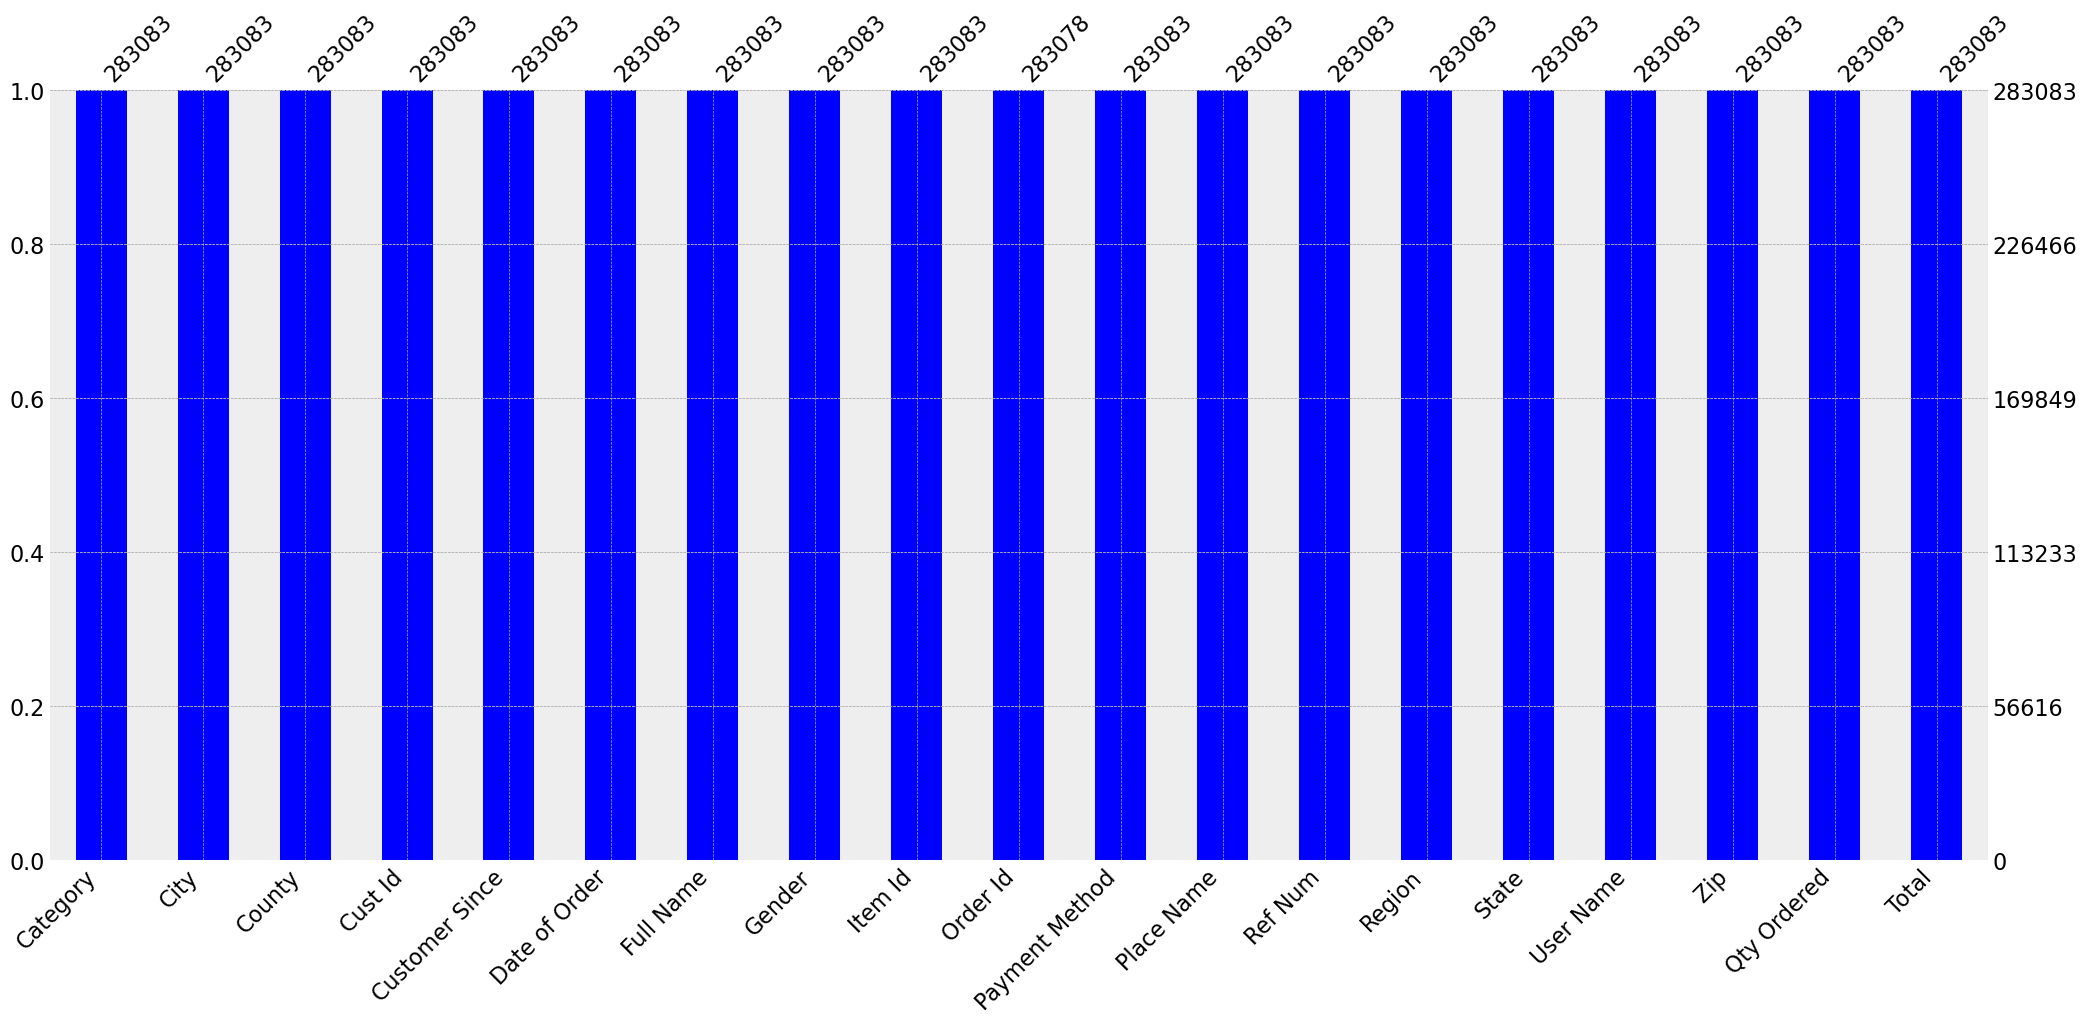

In [258]:
# To visualize the missing data using missingo

msno.bar(data, color="blue");

In [259]:
# Replace missing values with the Mode (most frequent value)

mode_value = data['Order Id'].mode()[0]
data['Order Id'].fillna(mode_value, inplace=True)

In [260]:
# Confirming the replacement of missing values

null_vals = data.isnull().sum()
null_vals

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [261]:
# STATISTICAL DESCRIPTION OF ONLY THE CATEGORICAL FEATURES

data.describe(exclude=np.number).T

,count,unique,top,freq
Category,283083,15,Mobiles & Tablets,60954
City,283083,15668,Dekalb,2525
County,283083,2518,Jefferson,3510
Customer Since,283083,11629,11/30/2005,2536
Date of Order,283083,365,12/20/2021 0:00,13522
Full Name,283083,63610,"Gonzalez, Joel",2524
Gender,283083,2,M,144295
Payment Method,283083,13,cod,101750
Place Name,283083,15668,Dekalb,2525
Region,283083,4,South,103482


In [262]:
# Numerical Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust Id,283083.0,7.010682e+04,30215.394879,4.0,56640.0,74320.0,92371.0,1.153260e+05
Item Id,283083.0,7.417471e+05,95664.609013,574769.0,659898.5,742471.0,826078.5,9.052080e+05
Order Id,283083.0,1.004570e+08,60909.437556,100354677.0,100404736.0,100451838.0,100513391.5,1.005624e+08
Ref Num,283083.0,5.611079e+05,256101.205409,111127.0,341071.0,565623.0,782211.0,9.999810e+05
Zip,283083.0,4.914717e+04,27235.561738,210.0,26264.0,48808.0,72004.0,9.940200e+04
Qty Ordered,283083.0,3.008224e+00,4.565168,1.0,2.0,2.0,3.0,5.010000e+02
Total,283083.0,8.162307e+02,1986.164932,0.0,49.9,149.8,800.0,1.012626e+05


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Category        283083 non-null  object 
 1   City            283083 non-null  object 
 2   County          283083 non-null  object 
 3   Cust Id         283083 non-null  int64  
 4   Customer Since  283083 non-null  object 
 5   Date of Order   283083 non-null  object 
 6   Full Name       283083 non-null  object 
 7   Gender          283083 non-null  object 
 8   Item Id         283083 non-null  int64  
 9   Order Id        283083 non-null  float64
 10  Payment Method  283083 non-null  object 
 11  Place Name      283083 non-null  object 
 12  Ref Num         283083 non-null  int64  
 13  Region          283083 non-null  object 
 14  State           283083 non-null  object 
 15  User Name       283083 non-null  object 
 16  Zip             283083 non-null  int64  
 17  Qty Ordere

## Observation
- From the above, the 'Date of Order' and 'Customer Since' are in object. 
- Let's now convert them to datetime format.

In [264]:
# Converting the Date of Order column into a pandas datetime

data["Date of Order"]=pd.to_datetime(data["Date of Order"])
data["Customer Since"]=pd.to_datetime(data["Customer Since"])

In [265]:
# Confirming the convertion above
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283083 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [266]:
# Creating two columns (cust_loyalty, first_order_year) to show how long each customers has been purchasing from us

data['first_order_year'] = data['Customer Since'].dt.year
data['cust_loyalty'] = 2017 - data['first_order_year']

In [267]:
data.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,first_order_year,cust_loyalty
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0,2008,9
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8,2005,12
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9,2005,12
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9,2013,4
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9,2013,4


In [268]:
### Grouping Customer loyalty in 5-year categories:
### (NewCust: Customers of 5yrs and below, BronzeCust: Customers of 6 - 10yrs, SilverCust: Customers of 11 - 15yrs,
### GoldCust: Customers of 16 - 25yrs, PremCCust: Customers of 26 - 30yrs,PremBCust: Customers of 31 - 35yrs,
### PremACust: Customers of 36yrs and above)

def loyalty_group (x):
    if x <= 5:
        return "NewCust: <= 5yrs"
    elif x <= 10:
        return "BronzeCust: 6-10yrs"
    elif x <= 15:
        return "SilverCust: 11-15yrs"
    elif x <= 25:
        return "GoldCust: 16-25yrs"
    elif x <= 30:
        return "PremCCust: 26-30yrs"
    elif x <= 35:
        return "PremBCust: 31-35yrs"
    else:
        return "PremACust: >= 36yrs"

data['loyalty_group'] = data['cust_loyalty'].apply(loyalty_group)

In [269]:
# Splitting the dataset into numerical features (num_feat) and categorical features(cat_feat) for easy analysis and visualizations

num_feat = data.select_dtypes(include = ['float64', 'int64'])
cat_feat = data.select_dtypes(include = ['object'])

In [270]:
data.head(5)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,first_order_year,cust_loyalty,loyalty_group
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,352808,Midwest,IA,mcrenaud,50519,3,32.0,2008,9,BronzeCust: 6-10yrs
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.8,2005,12,SilverCust: 11-15yrs
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.9,2005,12,SilverCust: 11-15yrs
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,578056,Midwest,MN,lmdoiron,55552,2,6822.9,2013,4,NewCust: <= 5yrs
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,578056,Midwest,MN,lmdoiron,55552,2,2849.9,2013,4,NewCust: <= 5yrs


## Exploratory Data Analysis 
THE CATEGORICAL DATA VISUALIZATION AND ANALYSIS OF THE DATA ABOVE

##### UNIVARIATE ANALYSIS

In [271]:
cat_feat.columns

Index(['Category', 'City', 'County', 'Full Name', 'Gender', 'Payment Method',
       'Place Name', 'Region', 'State', 'User Name', 'loyalty_group'],
      dtype='object')

In [272]:
# To see the count of each loyalty group.

data["loyalty_group"].value_counts()

NewCust: <= 5yrs        119612
BronzeCust: 6-10yrs      55054
GoldCust: 16-25yrs       46321
SilverCust: 11-15yrs     42012
PremCCust: 26-30yrs      13329
PremBCust: 31-35yrs       5484
PremACust: >= 36yrs       1271
Name: loyalty_group, dtype: int64

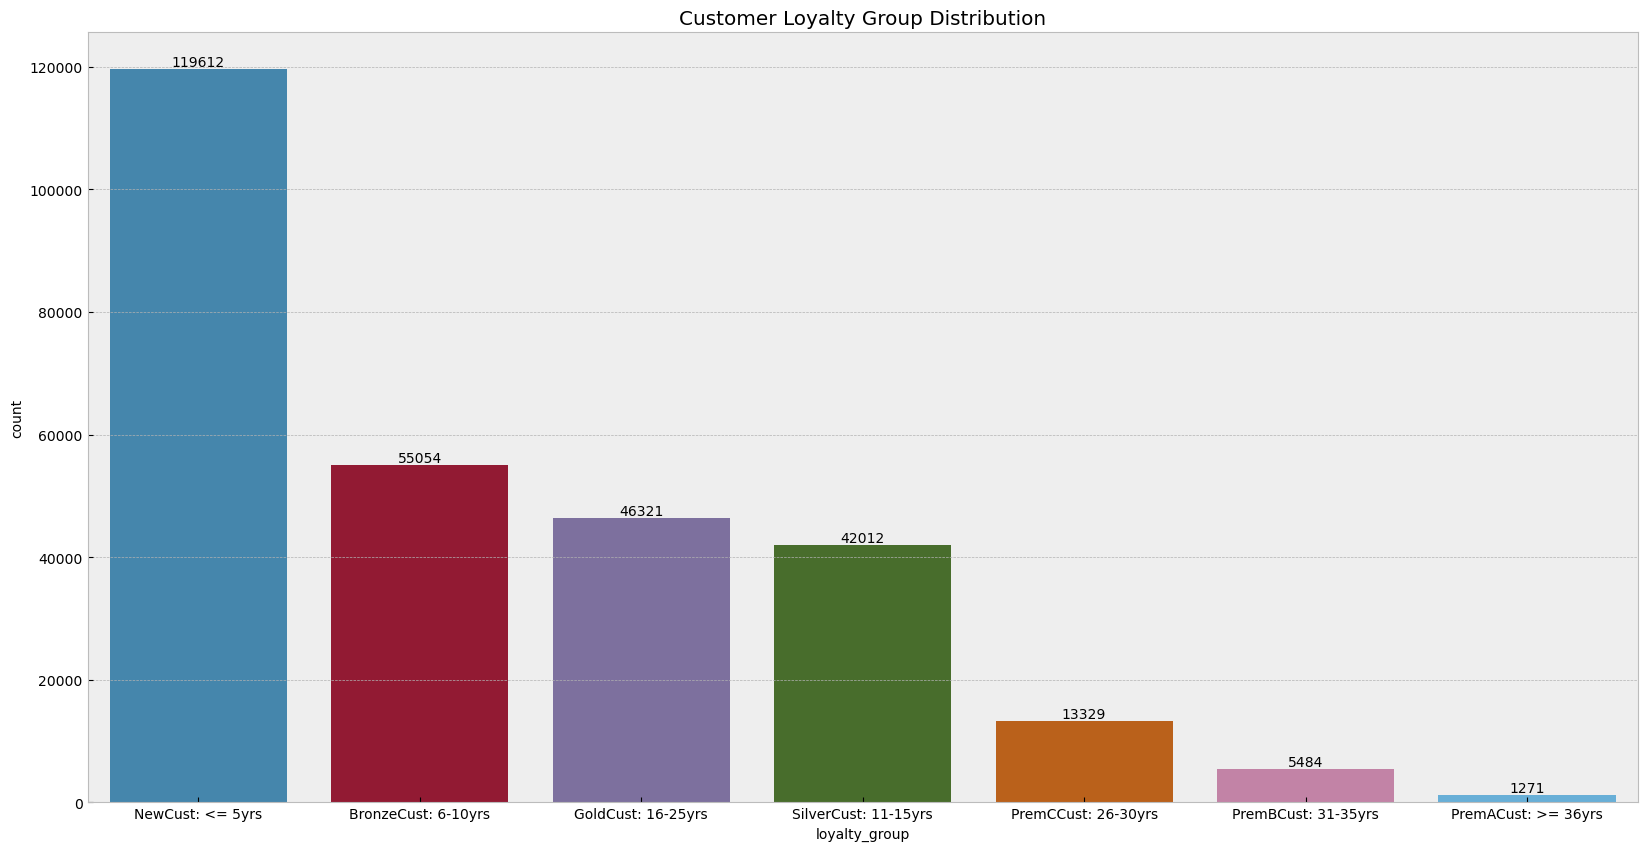

In [273]:
# Visualizing the Customer loyalty groups

plt.figure(figsize = (20,10))
plt.title('Customer Loyalty Group Distribution')

ax = sns.countplot(x=data["loyalty_group"], order = data["loyalty_group"].value_counts(ascending=False).index)
values = data["loyalty_group"]. value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

plt.show();

## Observation

* New Customers (<= 5 Years Loyalty):New customers with a loyalty period of 5 years or less, contribute the highest total payment to the business.This group represents the majority of customers, suggesting that acquiring new customers is essential for generating revenue.It implies that the business should focus on retaining and nurturing these customers to maximize their lifetime value. 

* Bronze Customers (6-10 Years Loyalty):Customers who have been loyal for 6 to 10 years make a significant contribution to the total payment. While their individual payments may not be as high as new customers, their collective impact is substantial.This group indicates that customers tend to continue purchasing from the business even after the initial 5 years. 

* Silver Customers (11-15 Years Loyalty):Customers with 11 to 15 years of loyalty continue to contribute to total payment, although their numbers are fewer.Their loyalty suggests satisfaction with the business over an extended period, which is valuable.Strategies to further engage and retain these customers should be considered.

* Gold and Premium Customers (16+ Years Loyalty):Customers with 16 or more years of loyalty make relatively lower total payments individually.However, they represent a group of long-term loyal customers who have been with the business for a considerable time.While their individual payments may be smaller, their continued loyalty is a testament to the business's sustained quality and service.

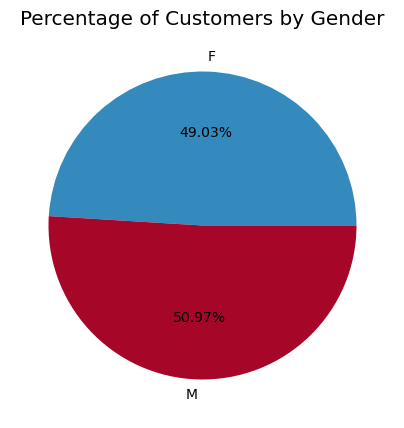

In [274]:
#Total Customers by Gender usind a piechat

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["Gender"])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Customers by Gender")

plt.show();

#### Observation
* Gender Distribution: The pie chart displays a relatively balanced gender distribution among the customer base. Male customers represent a slightly larger portion of the customer base compared to female customers.
* Near Gender Parity: The chart indicates that the business has successfully attracted a diverse range of customers in terms of gender. The near gender parity suggests that the business's products or services appeal to a broad audience.

In [275]:
data.head(5)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,first_order_year,cust_loyalty,loyalty_group
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,352808,Midwest,IA,mcrenaud,50519,3,32.0,2008,9,BronzeCust: 6-10yrs
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.8,2005,12,SilverCust: 11-15yrs
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.9,2005,12,SilverCust: 11-15yrs
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,578056,Midwest,MN,lmdoiron,55552,2,6822.9,2013,4,NewCust: <= 5yrs
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,578056,Midwest,MN,lmdoiron,55552,2,2849.9,2013,4,NewCust: <= 5yrs


In [276]:
## Total number of Orders in the Category 

data["Category"].value_counts()

Mobiles & Tablets     60954
Men's Fashion         40183
Appliances            32693
Women's Fashion       28003
Others                25913
Beauty & Grooming     17723
Entertainment         17120
Superstore            14815
Home & Living         13815
Health & Sports        8347
Computing              8025
Soghaat                7189
Kids & Baby            6421
School & Education     1078
Books                   804
Name: Category, dtype: int64

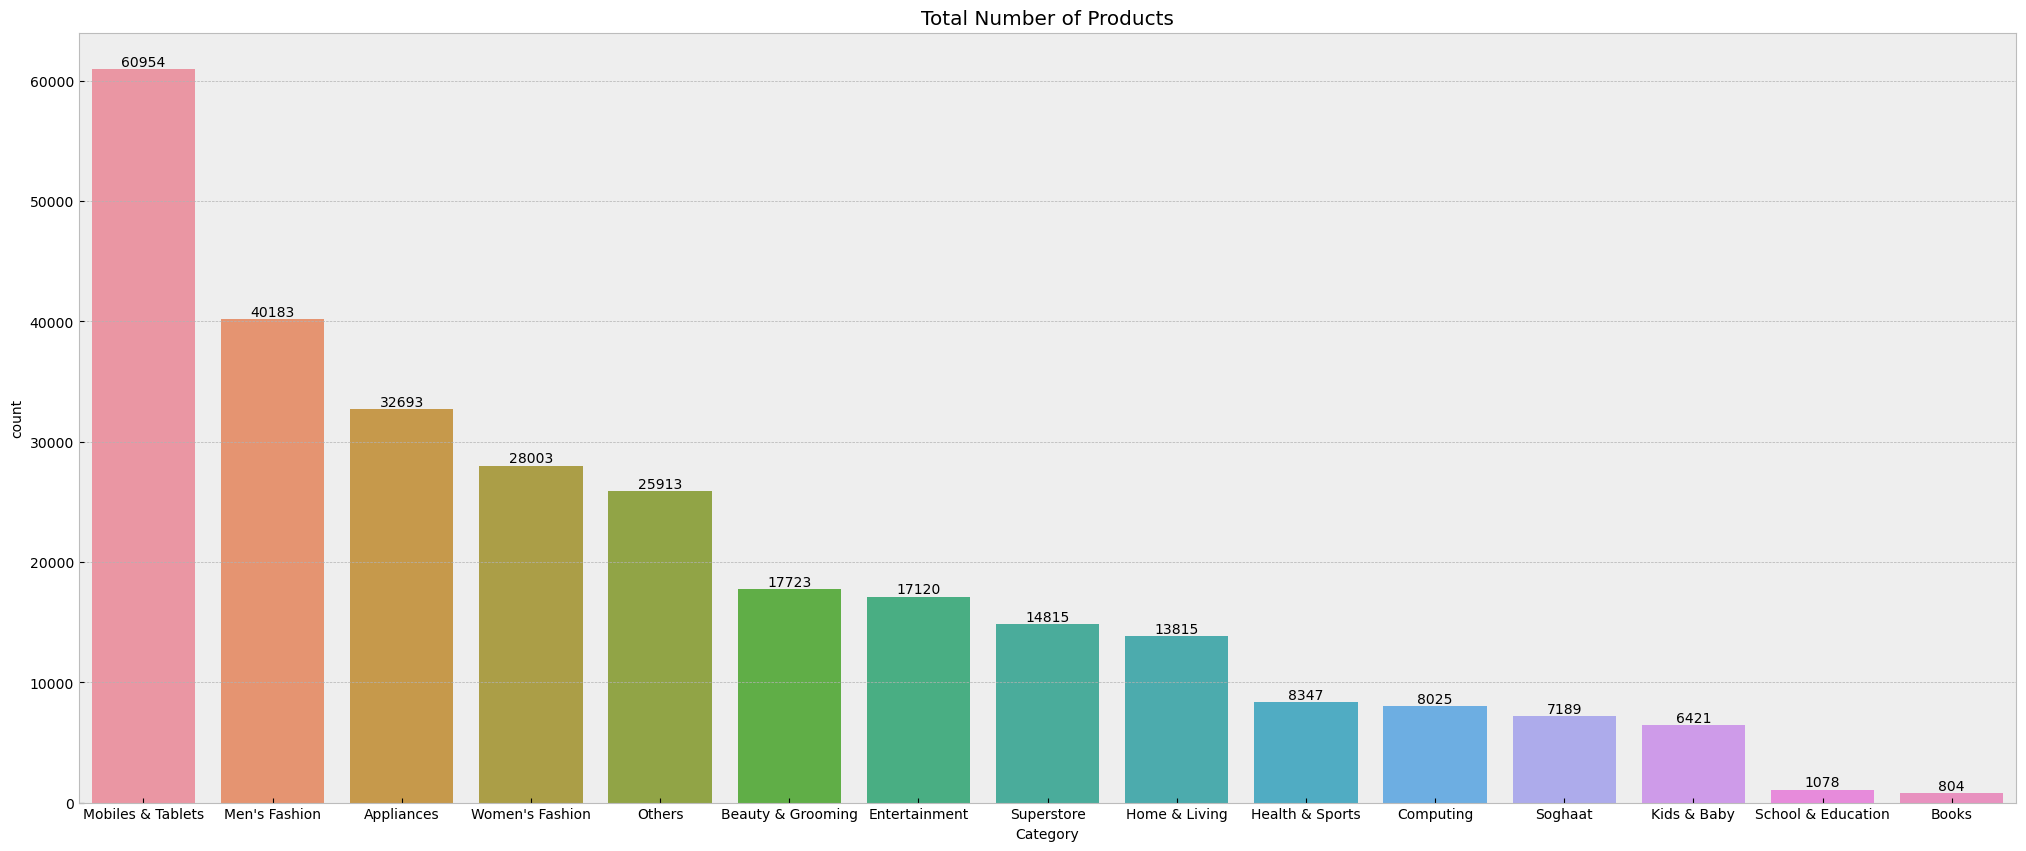

In [277]:
# Visualizing the total number of products using a plot chat

plt.figure(figsize=(25,10))
plt.title('Total Number of Products')

ax = sns.countplot(x=data["Category"], order = data["Category"].value_counts(ascending=False).index)
values = data["Category"]. value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

plt.show();

## Observation
* The chart reveals the popularity of various product categories among customers.
* The "Mobiles & Tablets" category stands out as the most popular, with the highest number of orders.

In [278]:
#Featured Categorical Columns

cat_feat.columns

Index(['Category', 'City', 'County', 'Full Name', 'Gender', 'Payment Method',
       'Place Name', 'Region', 'State', 'User Name', 'loyalty_group'],
      dtype='object')

Dekalb           2525
Washington       2008
New York City    1391
Houston          1249
El Paso          1019
Atlanta           999
Dallas            838
Springfield       817
Albany            726
Kittanning        716
Name: City, dtype: int64


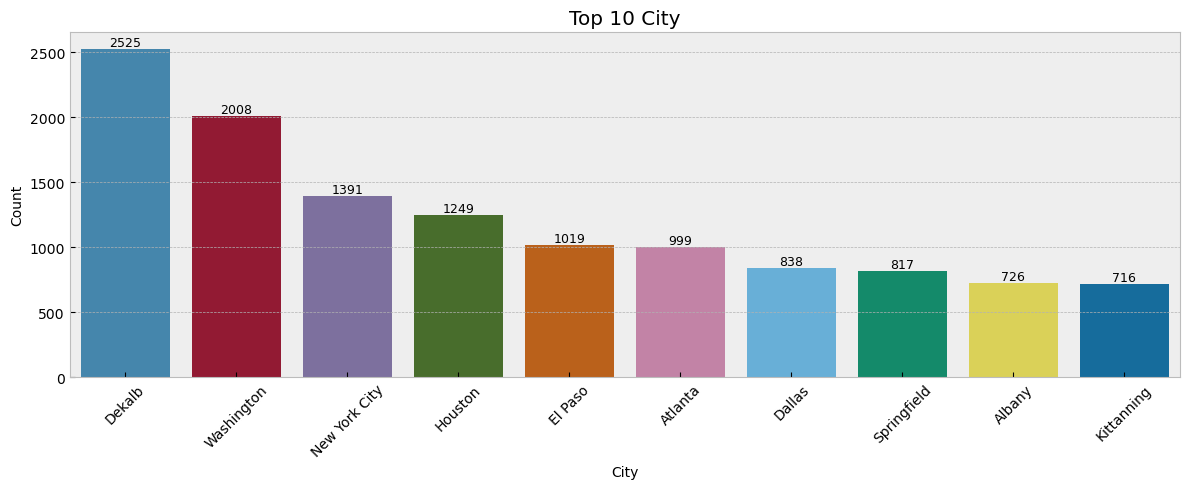

In [279]:
#Lets' look at the top 10 Cities

plt.figure(figsize=(12,5))
topten = data["City"].value_counts().head(10)

sns.countplot(x="City", data=data, order=topten.index)
ax=sns.countplot(x="City", data=data,  order=topten.index)
for p, value in zip(ax.patches, topten.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black') #to display the values on each bar
    
plt.xticks(rotation=45) # to rotate the x-axis label for readability
plt.title('Top 10 City')
plt.xlabel('City')
plt.ylabel('Count') 

plt.tight_layout() # to space the vlues properly

print(topten);

## Observation
* The city of "Dekalb" stands out as the top city with the highest number of orders, significantly surpassing other cities in the top ten.This indicates that "Dekalb" has a substantial customer base and a strong demand for the products offered.

* Several urban cities, such as "Washington," "New York City," and "Houston," are among the top ten cities.Urban areas typically have higher populations and more consumer activity, which can translate into increased online orders. 

Jefferson      3510
Los Angeles    3198
DeKalb         3098
Washington     2863
Montgomery     2563
Orange         2474
Wayne          1971
Monroe         1906
Franklin       1878
Polk           1846
Name: County, dtype: int64


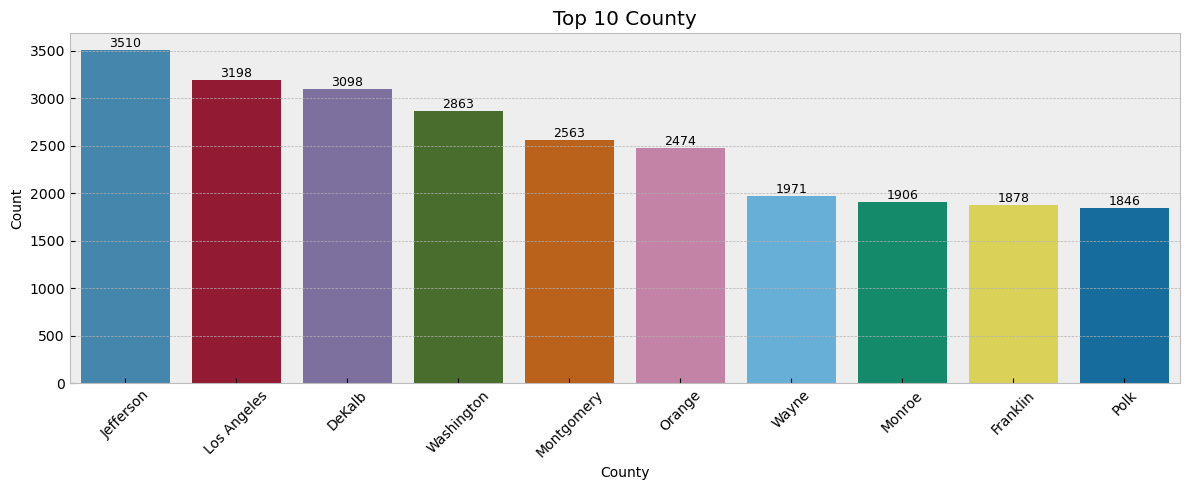

In [280]:
#Lets' look at the top 10 County

plt.figure(figsize=(12,5))
topten = data["County"].value_counts().head(10)

sns.countplot(x="County", data=data, order=topten.index)
ax=sns.countplot(x="County", data=data,  order=topten.index)
for p, value in zip(ax.patches, topten.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black') #to display the values on each bar
    
plt.xticks(rotation=45) # to rotate the x-axis label for readability
plt.title('Top 10 County')
plt.xlabel('County')
plt.ylabel('Count') 

plt.tight_layout() # to space the vlues properly

print(topten);

## Observation
* The bar chart offers insights into the distribution of orders across different counties, focusing on the top ten counties with the highest number of orders.
* The county of "Jefferson" emerges as the top county with the highest number of orders, significantly surpassing other counties in the top ten.This suggests that "Jefferson" is a key market for the business, with a substantial customer base.
* The top ten counties are geographically diverse, indicating that the business attracts customers from various regions. This diversity suggests a wide reach and potential for growth in multiple locations.
* Counties like "Los Angeles," "Dekalb," and "Washington" are among the top ten, representing both urban and suburban areas.This mix of urban and suburban customers implies that the business caters to a diverse range of lifestyles and preferences.

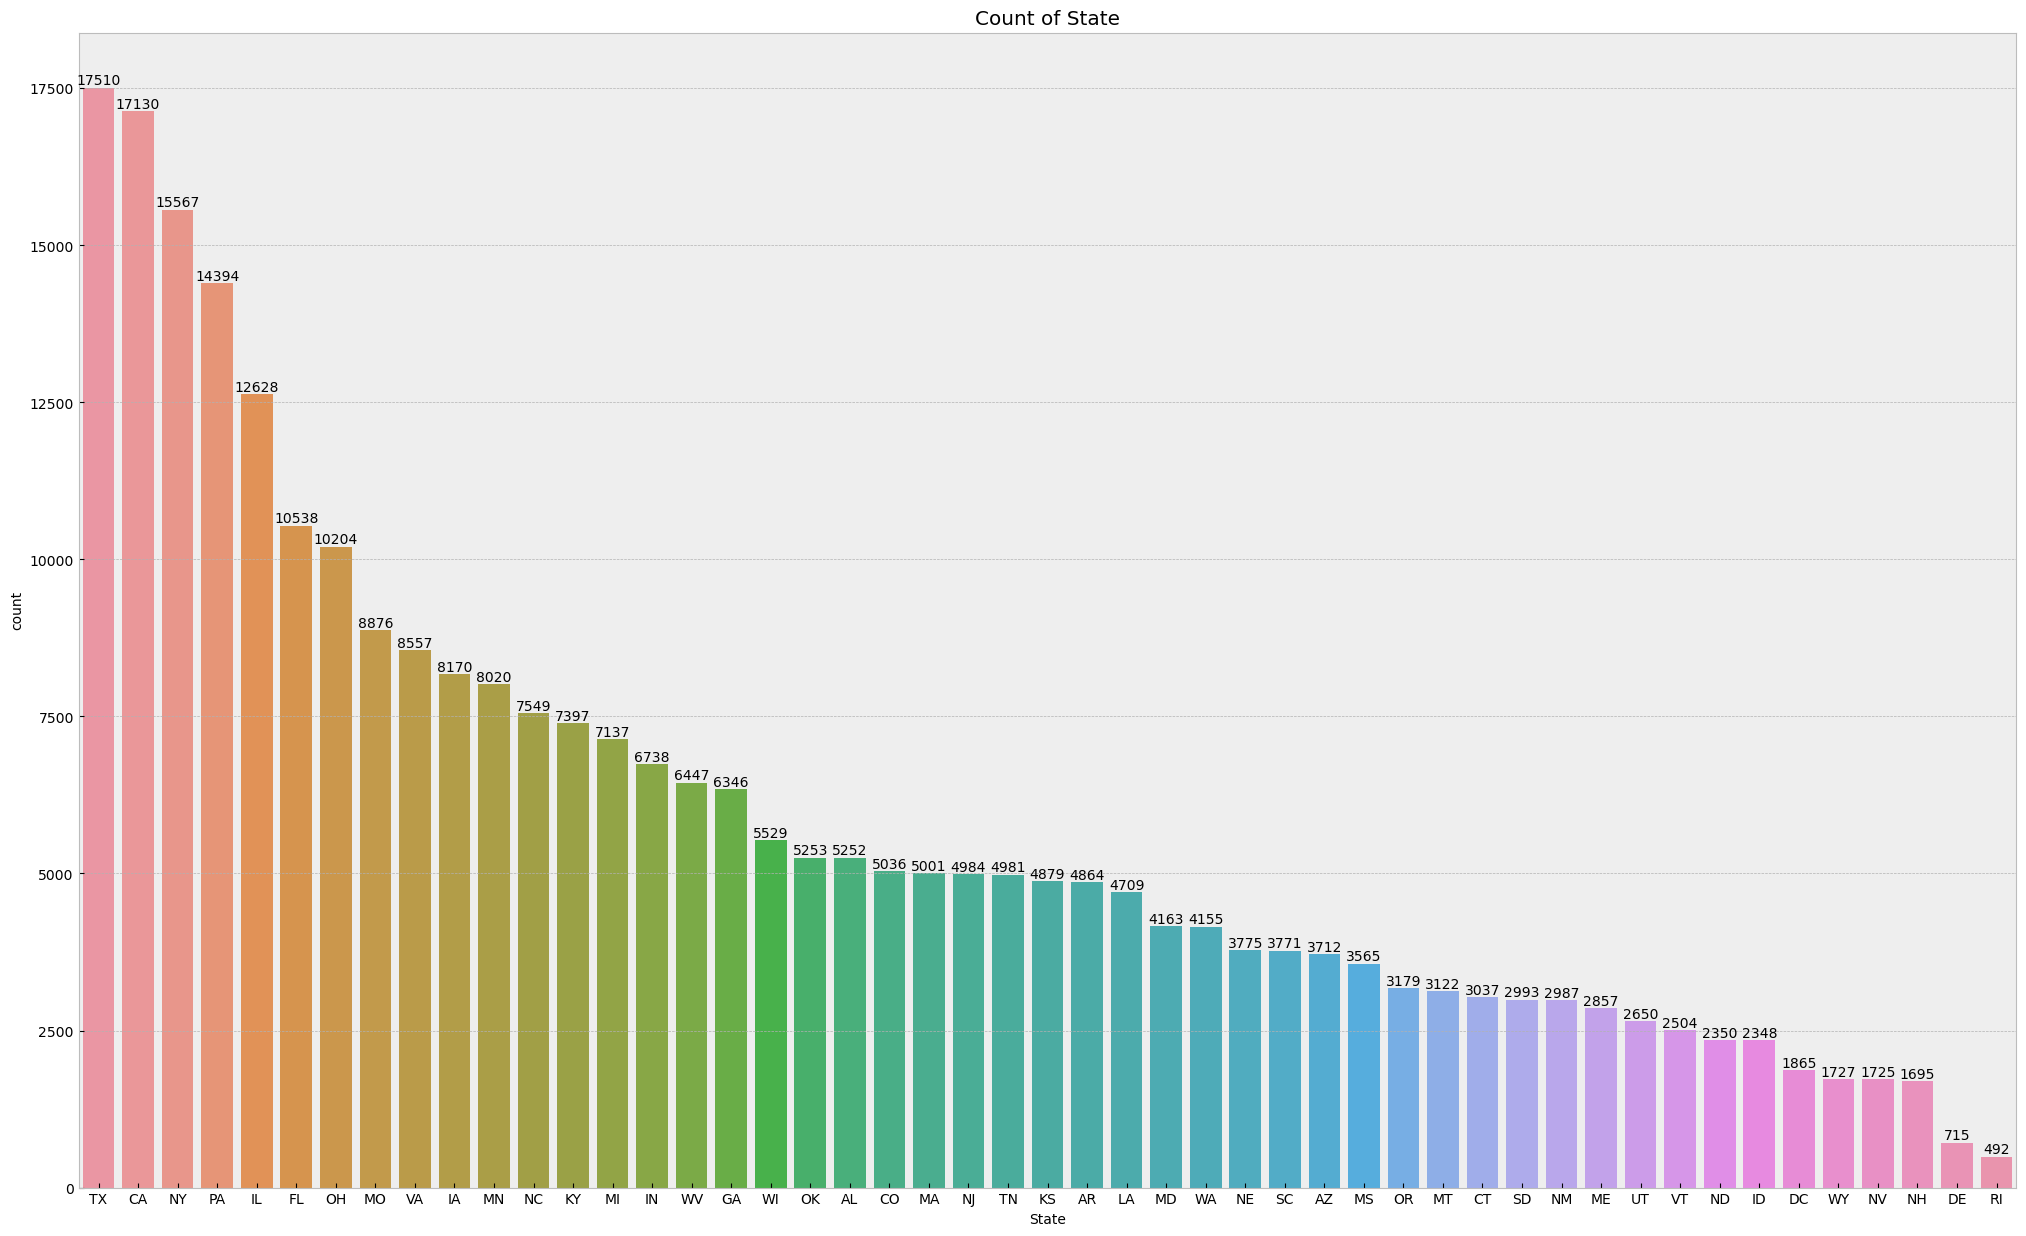

In [281]:
# Looking at the count of States

fig, ax = plt.subplots(figsize = (25,15))
plt.title('Count of State')
sns.countplot(x = 'State', data = data, order = data['State'].value_counts(ascending = False).index)
values = data['State'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

TX    17510
CA    17130
NY    15567
PA    14394
IL    12628
FL    10538
OH    10204
MO     8876
VA     8557
IA     8170
Name: State, dtype: int64


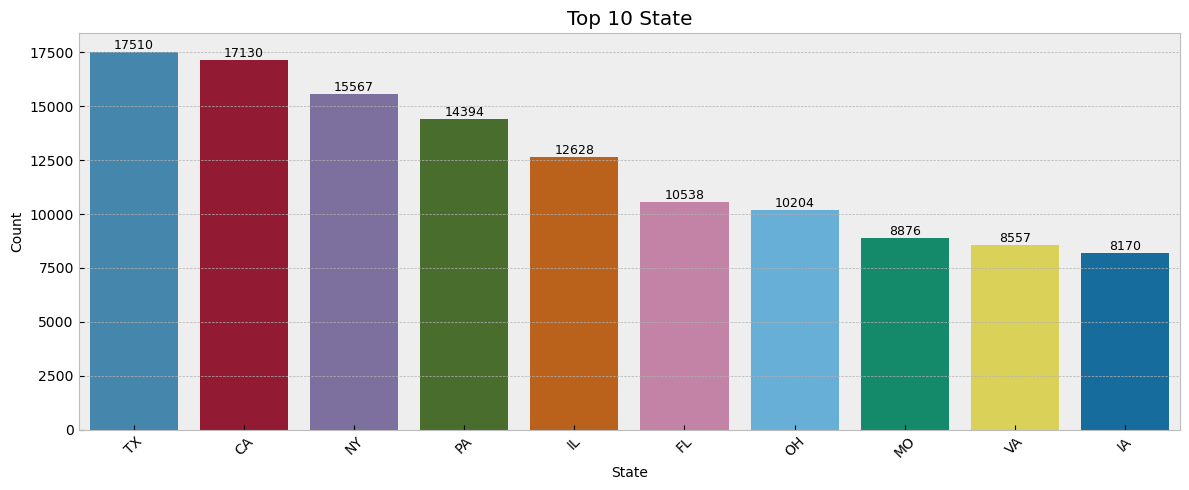

In [282]:
#Lets' look at the top 10 State

plt.figure(figsize=(12,5))
topten = data["State"].value_counts().head(10)

sns.countplot(x="State", data=data, order=topten.index)
ax=sns.countplot(x="State", data=data,  order=topten.index)
for p, value in zip(ax.patches, topten.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black') #to display the values on each bar
    
plt.xticks(rotation=45) # to rotate the x-axis label for readability
plt.title('Top 10 State')
plt.xlabel('State')
plt.ylabel('Count') 

plt.tight_layout() # to space the vlues properly

print(topten);

Least 10 States:
UT    2650
VT    2504
ND    2350
ID    2348
DC    1865
WY    1727
NV    1725
NH    1695
DE     715
RI     492
Name: State, dtype: int64


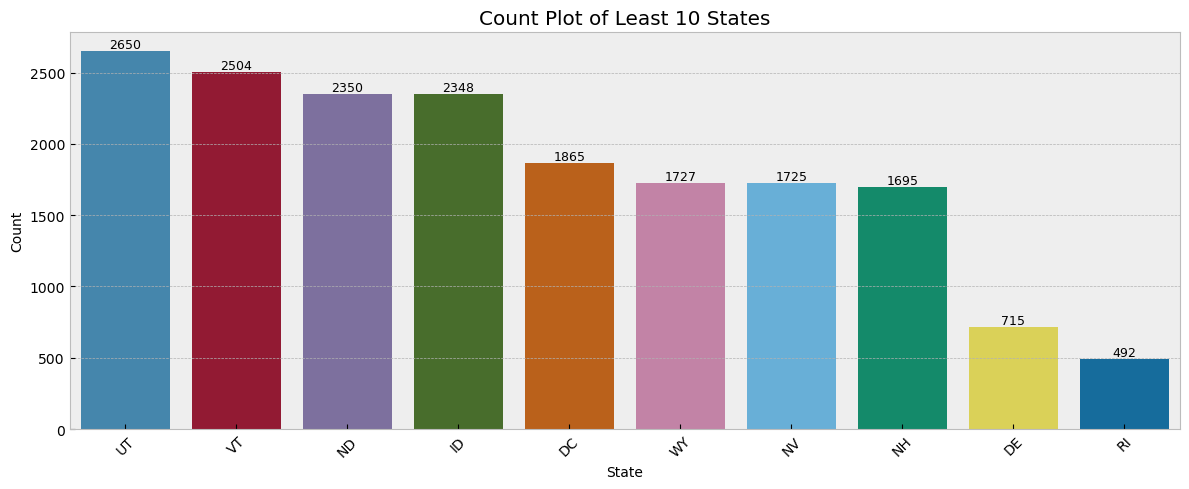

In [283]:
#Lets' look at the least 10 States

plt.figure(figsize=(12,5))
leastten = data["State"].value_counts().tail(10)

sns.countplot(x="State", data=data, order=leastten.index)
ax=sns.countplot(x="State", data=data,  order=leastten.index)
for p, value in zip(ax.patches, leastten.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.xticks(rotation=45) 
plt.title('Count Plot of Least 10 States')
plt.xlabel('State')
plt.ylabel('Count') 

plt.tight_layout() 

print("Least 10 States:") 
print (leastten);

## Observation
* The "Count of States" bar chart illustrates the diversity of the business's reach, showing that orders originate from numerous states across the country.
* In contrast the "Top Ten States" bar chart reveals the concentration of orders in specific states. It highlights the top states where the business enjoys the highest order volumes.
* The "Top Ten States" data is crucial for focused marketing efforts, supply chain optimization, and competition analysis in high-order volume regions while the "Count of States" data highlights the business's nationwide presence, suggesting potential for expansion to untapped markets and diversification.


In [284]:
# Looking at the count of Region

data['Region'].value_counts()

South        103482
Midwest       81299
Northeast     50531
West          47771
Name: Region, dtype: int64

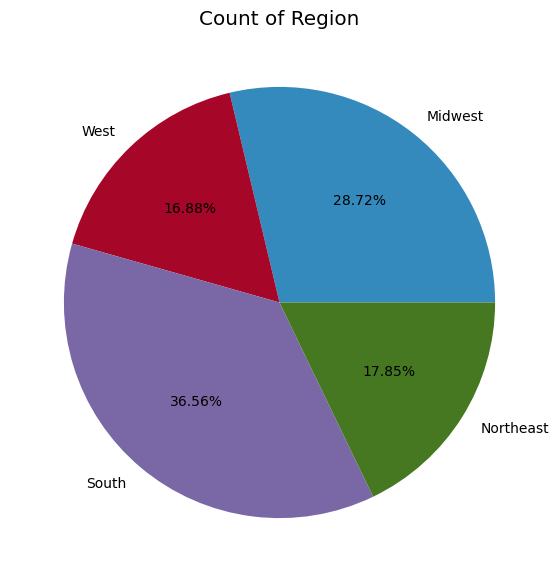

In [285]:
# Visualizing the regional orders

fig, ax = plt.subplots(figsize = (7,7))
plt.title('Count of Region')
count = Counter(cat_feat["Region"])

ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f'{p:.2f}%')

plt.show();

## Observation
* The "Count of Region" pie chart provides an overview of order distribution across different regions. Each slice of the pie represents a specific region's contribution to the total number of orders.
* It's evident that orders are not evenly distributed, with some regions contributing significantly more orders than others.
* The largest slice of the pie corresponds to the "South" region, indicating that it's the primary source of orders.This suggests that the business has a strong presence or customer base in the South region.
* Conversely, the "West" region has the smallest slice of the pie, indicating a lower volume of orders from this area. Indicating an opportunity for the business to explore strategies to increase its market share in the West.

In [286]:
# Looking at the count of Payment Methods

data['Payment Method'].value_counts()

cod                  101750
Easypay               68915
Payaxis               30657
easypay_voucher       29397
bankalfalah           22697
Easypay_MA            11452
jazzwallet             6614
jazzvoucher            5977
customercredit         3660
apg                    1748
mcblite                 206
cashatdoorstep            9
financesettlement         1
Name: Payment Method, dtype: int64

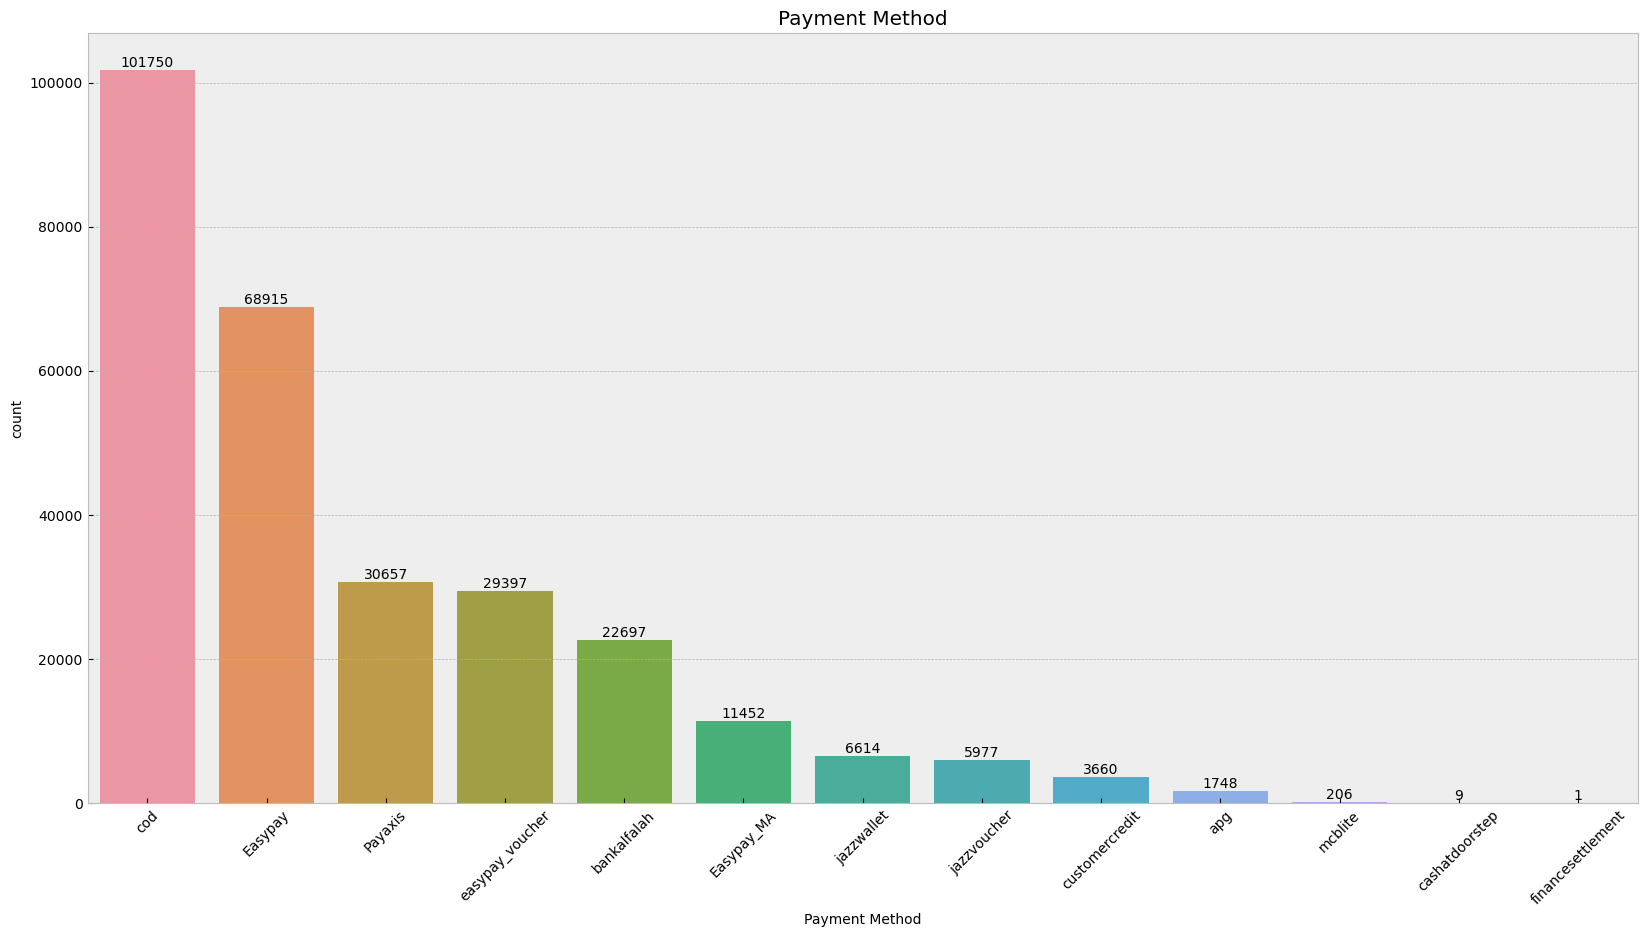

In [287]:
# Visualizing the Payment Methods

fig, ax = plt.subplots(figsize = (20,10))
plt.title('Payment Method')
plt.xticks(rotation=45) 
sns.countplot(x = 'Payment Method', data = data, order = data['Payment Method'].value_counts(ascending = False).index)
values = data['Payment Method'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0], labels = values);

# Observation
* The bar chart reveals that the "COD" (Cash on Delivery) payment method is the most frequently used by customers.
* COD payments account for the highest number of orders, indicating that many customers prefer paying for their purchases upon delivery.
* Following COD, "EasyPay" and "Bank Alfalah" are the next most popular payment methods.EasyPay seems to be a preferred digital payment method, reflecting the growing trend of online transactions.Bank Alfalah is also commonly used, suggesting that customers trust this banking service for their payments.
* The presence of multiple payment methods, including "Financesettlement," "JazzCash," and "Credit Card," highlights the flexibility provided to customers.
* The business's adaptability to diverse payment methods aligns with modern e-commerce trends.

## UNIVARIATE ANALYSIS

####  THE NUMERICAL DATA VISUALIZATION AND ANALYSIS OF THE DATA ABOVE

In [288]:
num_feat.columns

Index(['Cust Id', 'Item Id', 'Order Id', 'Ref Num', 'Zip', 'Qty Ordered',
       'Total', 'first_order_year', 'cust_loyalty'],
      dtype='object')

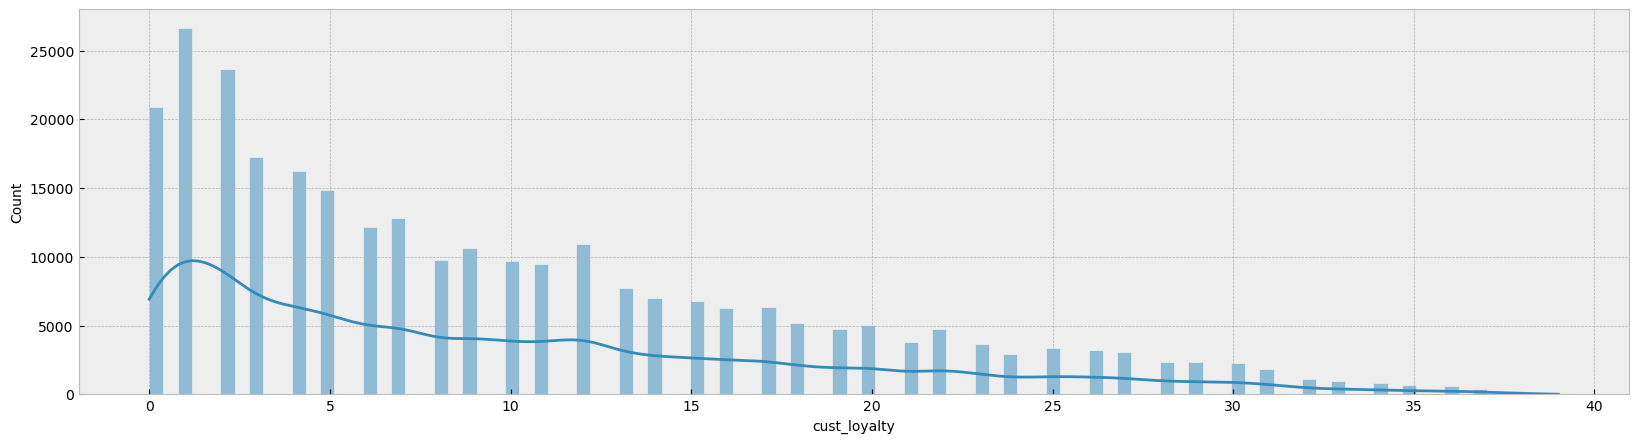

In [289]:
# Univariate distribution of the dependent feature (customer loyalty)
plt.figure(figsize=(20,5))
plt.style.use('bmh')
sns.histplot(data['cust_loyalty'],kde=True);

# Observation
  
* The chart illustrates the distribution of customer loyalty periods, showing how long customers have been purchasing from the business.
* The distribution curve of customer loyalty periods is positively skewed, meaning that the majority of customers have relatively shorter loyalty periods. Indicating that most customers have been patronizing the business for a limited duration.
* The presence of outliers on the right side of the distribution curve suggests a small group of customers with exceptionally long loyalty periods.we For instance, see some outliers above 35 years.
* These outliers may represent a segment of highly loyal, long-term customers who have consistently chosen the business over an extended period.


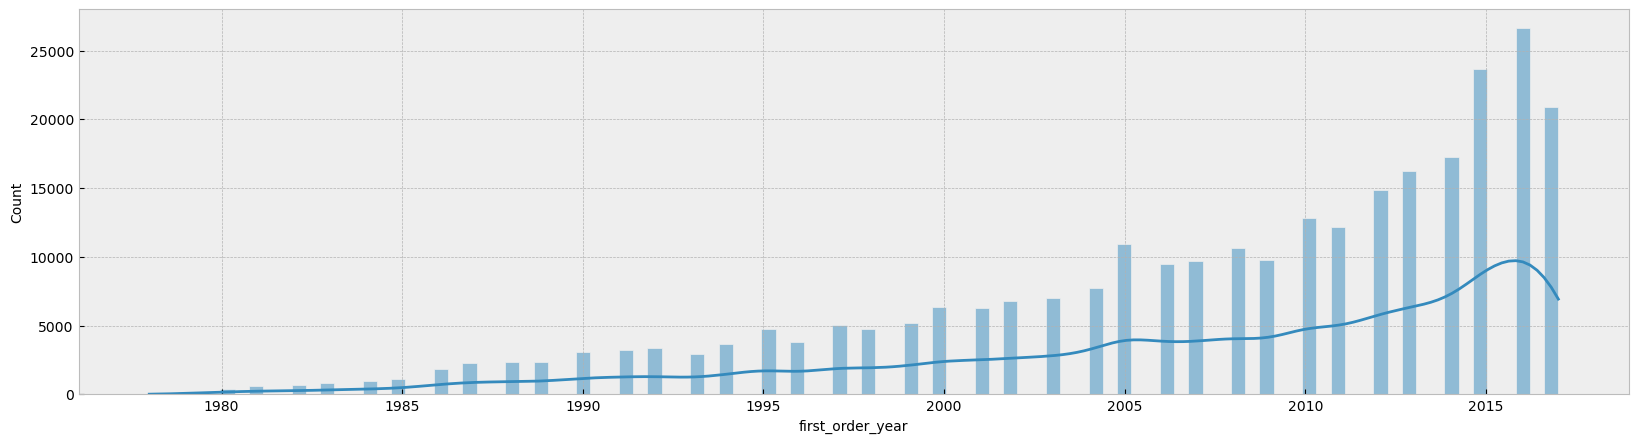

In [290]:
# Univariate distribution of the dependant feature ()
plt.figure(figsize=(20,5))
plt.style.use('bmh')
sns.histplot(data['first_order_year'],kde=True);

# Observation
* The Distribution of First_Order-Year chart illustrates the distribution of the year in which customers placed their first order with the business.
* The distribution curve of first_order_years shows a clear increasing trend, with the number of first orders generally rising over the years.
* This upward trajectory suggests that the business has experienced growth in customer acquisition over time.
* The chart reveals a peak in first orders around the year 2016, indicating a significant influx of new customers during that period.
* Following the peak year, the curve gradually declines, suggesting a reduction in the number of first orders in subsequent years.This decline could be due to market saturation, changing consumer preferences, or increased competition.

Text(0.5, 1.0, 'Boxplot on Customer Loyalty')

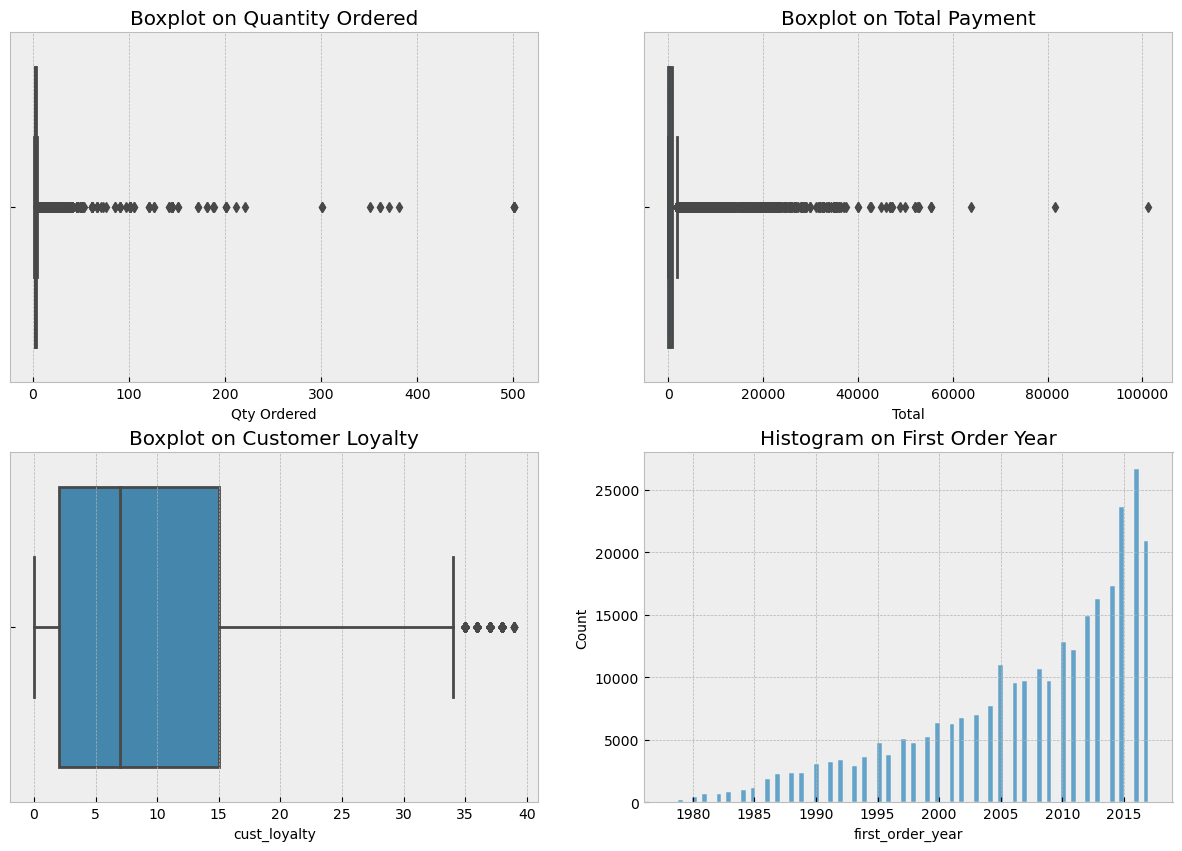

In [291]:
#Ploting all 4 numerical columns in one chat

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Qty Ordered", data =data, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity Ordered" )

sns.boxplot(x="Total", data =data, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Total Payment" )


sns.histplot(x="first_order_year", data =data, ax=axs[1,1])
axs[1,1].set_title("Histogram on First Order Year" )

sns.boxplot(x="cust_loyalty", data =data, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Customer Loyalty" )

# Observation 
* The boxplots indicate the presence of outliers in both Quantity Ordered and Total Payment, signifying variations in customer behavior.
* The boxplot for Total Payment presents the distribution of the total amount paid by customers. The majority of payments cluster in the lower and middle range, while a few customers make substantial payments.
* Customer Loyalty shows a wide range of loyalty periods, with a focus on customers who have been loyal for less than 10 years,indicating a mix of new and relatively long-term customers. 
* The histogram emphasizes the importance of the year 2016, indicating a substantial influx of new customers during that period.

## BIVARIATE ANALYSIS OF THE DATA ABOVE

In [292]:
data.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total', 'first_order_year',
       'cust_loyalty', 'loyalty_group'],
      dtype='object')

In [293]:
cat_feat.columns

Index(['Category', 'City', 'County', 'Full Name', 'Gender', 'Payment Method',
       'Place Name', 'Region', 'State', 'User Name', 'loyalty_group'],
      dtype='object')

In [294]:
num_feat.columns

Index(['Cust Id', 'Item Id', 'Order Id', 'Ref Num', 'Zip', 'Qty Ordered',
       'Total', 'first_order_year', 'cust_loyalty'],
      dtype='object')

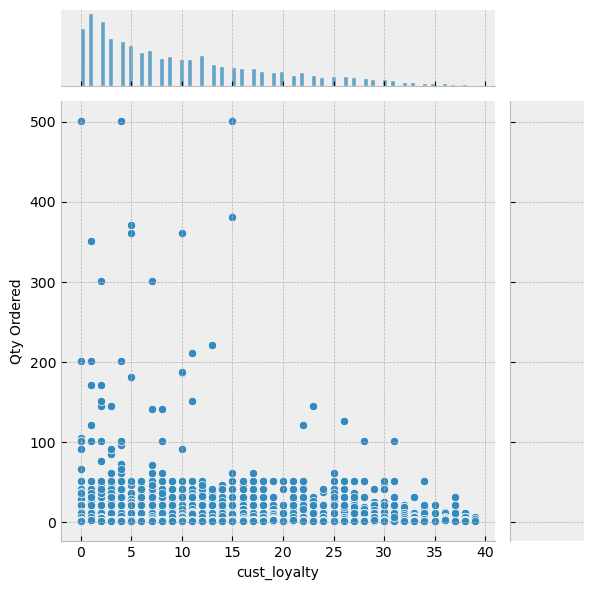

In [295]:
#relationships/correlations/interactions between Customer Loyalty Period and Quantity Ordered

sns.jointplot(x='cust_loyalty', y='Qty Ordered', data=num_feat)

# Observation
* There appears to be a weak negative relationship between Qauntity Ordered and Customer loyalty period, After 5 - 6yrs, the longer the loyalty period, the less the Qauntity ordered.
* This negative correlation suggests that long-term customers, who have been loyal for many years, tend to place smaller orders. In contrast, newer customers or those with shorter loyalty periods place larger orders.
* The plot also highlights some outliers where long-term customers place exceptionally high orders. These outliers could represent unique customer segments that warrant further investigation to tailor marketing or loyalty programs. For example; seasonal shoppers.  

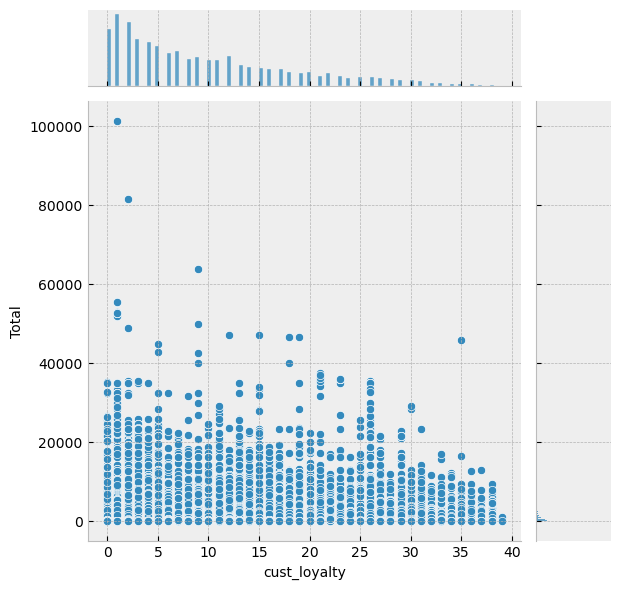

In [303]:
#relationships/correlations/interactions between Customer Loyalty Period and Total Payment

sns.jointplot(x='cust_loyalty', y='Total', data=num_feat)

# Observation
* There is also a strong negative relationship between Total Payment and Customer loyalty period, After 5 - 6yrs, the longer the loyalty period, the less the Total Payment.
* This means that, on average, customers who have been loyal to the business for a more extended period tend to make smaller payments per order.
* The plot also highlights distinct segments of customers. There is a cluster of points on the lower end of the Customer Loyalty Period (short-term customers) who tend to have higher Total Payments per order. On the other hand, long-term customers, especially those with loyalty periods beyond 15 years, tend to make smaller Total Payments per order. 

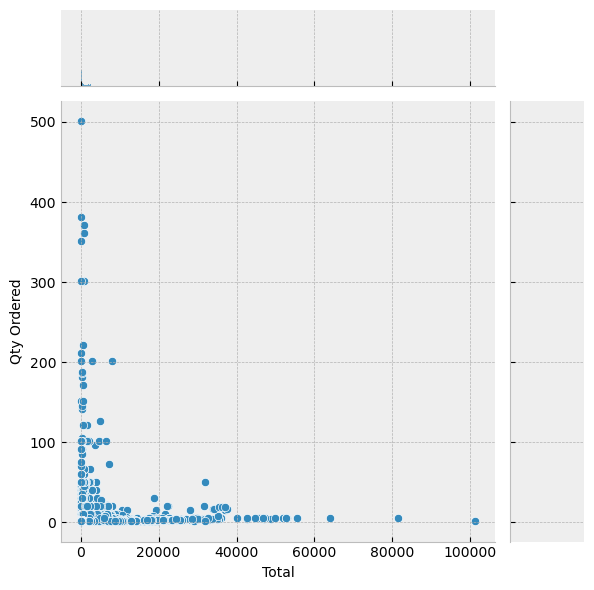

In [297]:
#relationships/correlations/interactions between Quantity Ordered and Total Payment

sns.jointplot(x='Total', y='Qty Ordered', data=num_feat)

# Observation
* The jointplot clearly demonstrates a positive correlation between Quantity Ordered and Total Payment. As the quantity of items ordered increases, the Total Payment also tends to increase. This indicates that customers who order more items tend to spend more money in total.

* The plot highlights distinct segments of customer behavior. There is a cluster of points where customers have placed small to moderate orders with relatively low Total Payments. This segment may represent budget-conscious or occasional shoppers who prioritize cost-effective purchases.

* On the other hand, there are scattered data points representing customers who have placed larger orders with significantly higher Total Payments. These customers can be considered bulk buyers or high-value customers who purchase in larger quantities and, consequently, contribute substantially to the business's revenue.

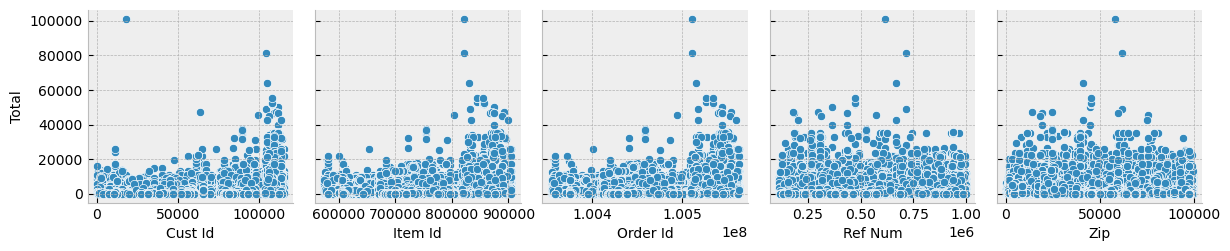

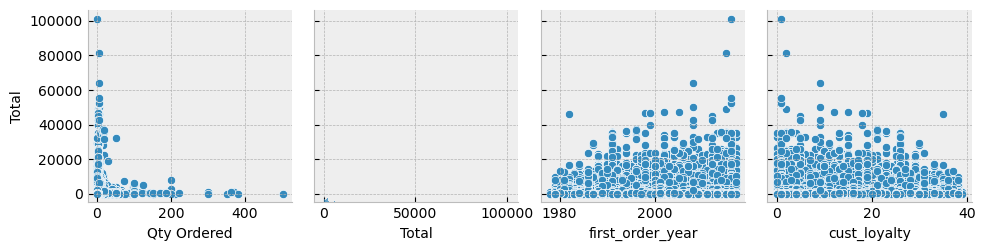

In [298]:
# Bivariant distribution for all the numerical features and the Total payment feature
for i in range(0, len(num_feat.columns), 5):
    sns.pairplot(data=num_feat,
                x_vars=num_feat.columns[i:i+5],
                y_vars=['Total'])

## Observation
* In this distribution analysis, examining relationships between numerical features (Cust ID, Item ID, Order ID, ZIP) and Total Payment reveals no strong correlations. 
* Individual customer IDs, item IDs, order IDs, or ZIP codes do not consistently influence payment amounts. Payment variation exists across different customers, items, orders, and ZIP codes, suggesting that other factors, like order quantity, loyalty, or payment methods, play more critical roles. 

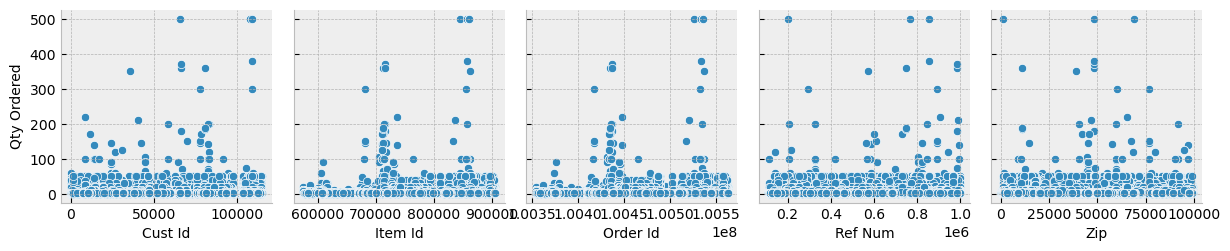

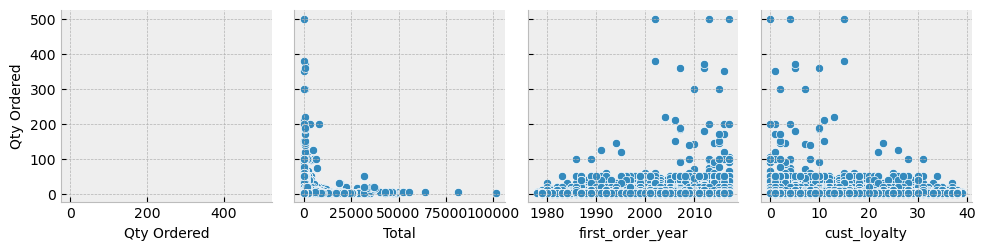

In [299]:
# Bivariant distribution for all the numerical features and the Qty Ordered feature
for i in range(0, len(num_feat.columns), 5):
    sns.pairplot(data=num_feat,
                x_vars=num_feat.columns[i:i+5],
                y_vars=['Qty Ordered'])

# Observation
* We can observe a perfect positive relationship between total payment and qauntity ordered against first order year. The higher the quantity and Total payments, the higher the first order year.
* However, no significant relationships were observed between Quantity Ordered and the other numerical features. 

### Correlation

### Let's explore features that are correlated 

In [300]:
# First Order Year

corr_feat = num_feat.corr()['first_order_year']
corr_feat

Cust Id             0.012546
Item Id             0.001124
Order Id            0.001151
Ref Num             0.020733
Zip                 0.005804
Qty Ordered         0.013251
Total              -0.016598
first_order_year    1.000000
cust_loyalty       -1.000000
Name: first_order_year, dtype: float64

In [301]:
#Let's filter all weak correlations
corr_feat = num_feat.corr()['first_order_year']
imp_feat = corr_feat[corr_feat>0.5]
imp_feat

first_order_year    1.0
Name: first_order_year, dtype: float64

# Observation
  - There is a strong negative relationship between the First Order year and Customer Loyalty

In [304]:
# Total Payment

corr_feat2 = num_feat.corr()['Total']
corr_feat2

Cust Id             0.122454
Item Id             0.091111
Order Id            0.091002
Ref Num            -0.005905
Zip                -0.003423
Qty Ordered         0.002838
Total               1.000000
first_order_year   -0.016598
cust_loyalty        0.016598
Name: Total, dtype: float64

In [305]:
#Let's filter all weak correlations
corr_feat2 = num_feat.corr()['Total']
imp_feat2 = corr_feat2[corr_feat2>0.5]
imp_feat2

Total    1.0
Name: Total, dtype: float64

# Observation
  - No strong correlation observed between the dependent variables

In [306]:
# Customer Loyalty

corr_feat3 = num_feat.corr()['cust_loyalty']
corr_feat3

Cust Id            -0.012546
Item Id            -0.001124
Order Id           -0.001151
Ref Num            -0.020733
Zip                -0.005804
Qty Ordered        -0.013251
Total               0.016598
first_order_year   -1.000000
cust_loyalty        1.000000
Name: cust_loyalty, dtype: float64

In [307]:
#Let's filter all weak negative correlations
ncorr_feat = num_feat.corr()['cust_loyalty']
imp_feat3 = ncorr_feat[ncorr_feat<0.5]
imp_feat3

Cust Id            -0.012546
Item Id            -0.001124
Order Id           -0.001151
Ref Num            -0.020733
Zip                -0.005804
Qty Ordered        -0.013251
Total               0.016598
first_order_year   -1.000000
Name: cust_loyalty, dtype: float64

# Observation
  - There is a strong negative correlation observed between customer loyalty period and First Order Year

<Figure size 1000x600 with 0 Axes>

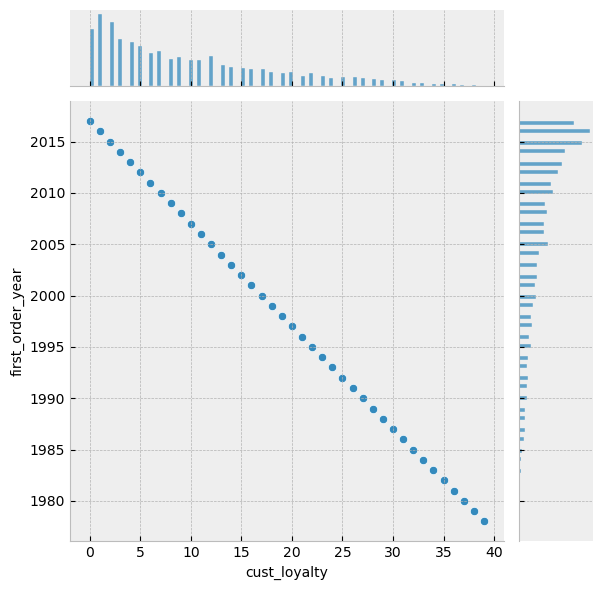

In [308]:
#visualizing the correlation of the above dependent variables

plt.figure(figsize=(10,6))
sns.jointplot(x='cust_loyalty', y='first_order_year', data=data);

# Observation
  - There is a strong negative correlation observed between customer loyalty period and First Order Year

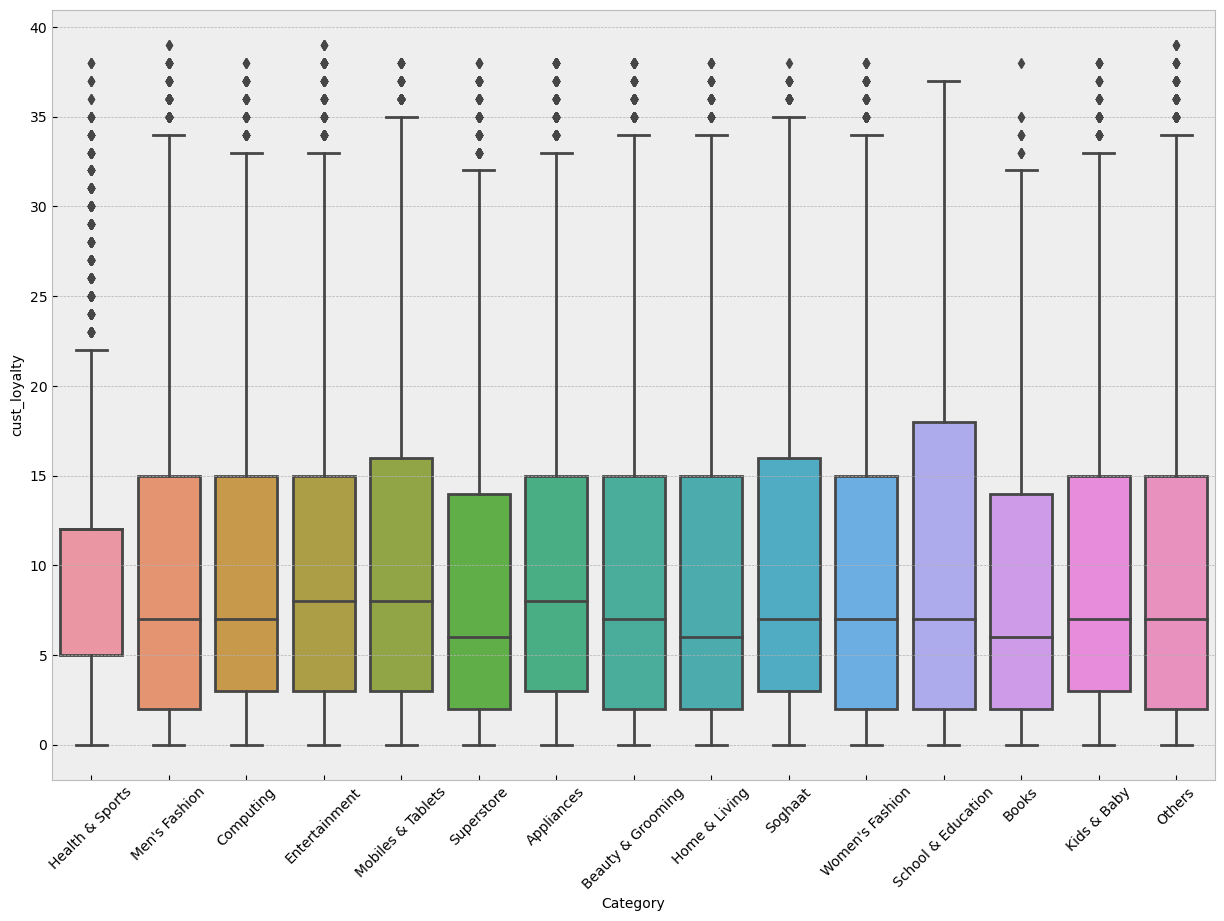

In [314]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Category', y='cust_loyalty', data=data)
plt.xticks(rotation=45) ;

# Observation
  - Customers interested in School & Education materials have the longest loyalty duration followed by 
    customers Mobiles & Tablets as well as Soghaat.

##  Additional Analysis

#### Focus - Total Payment

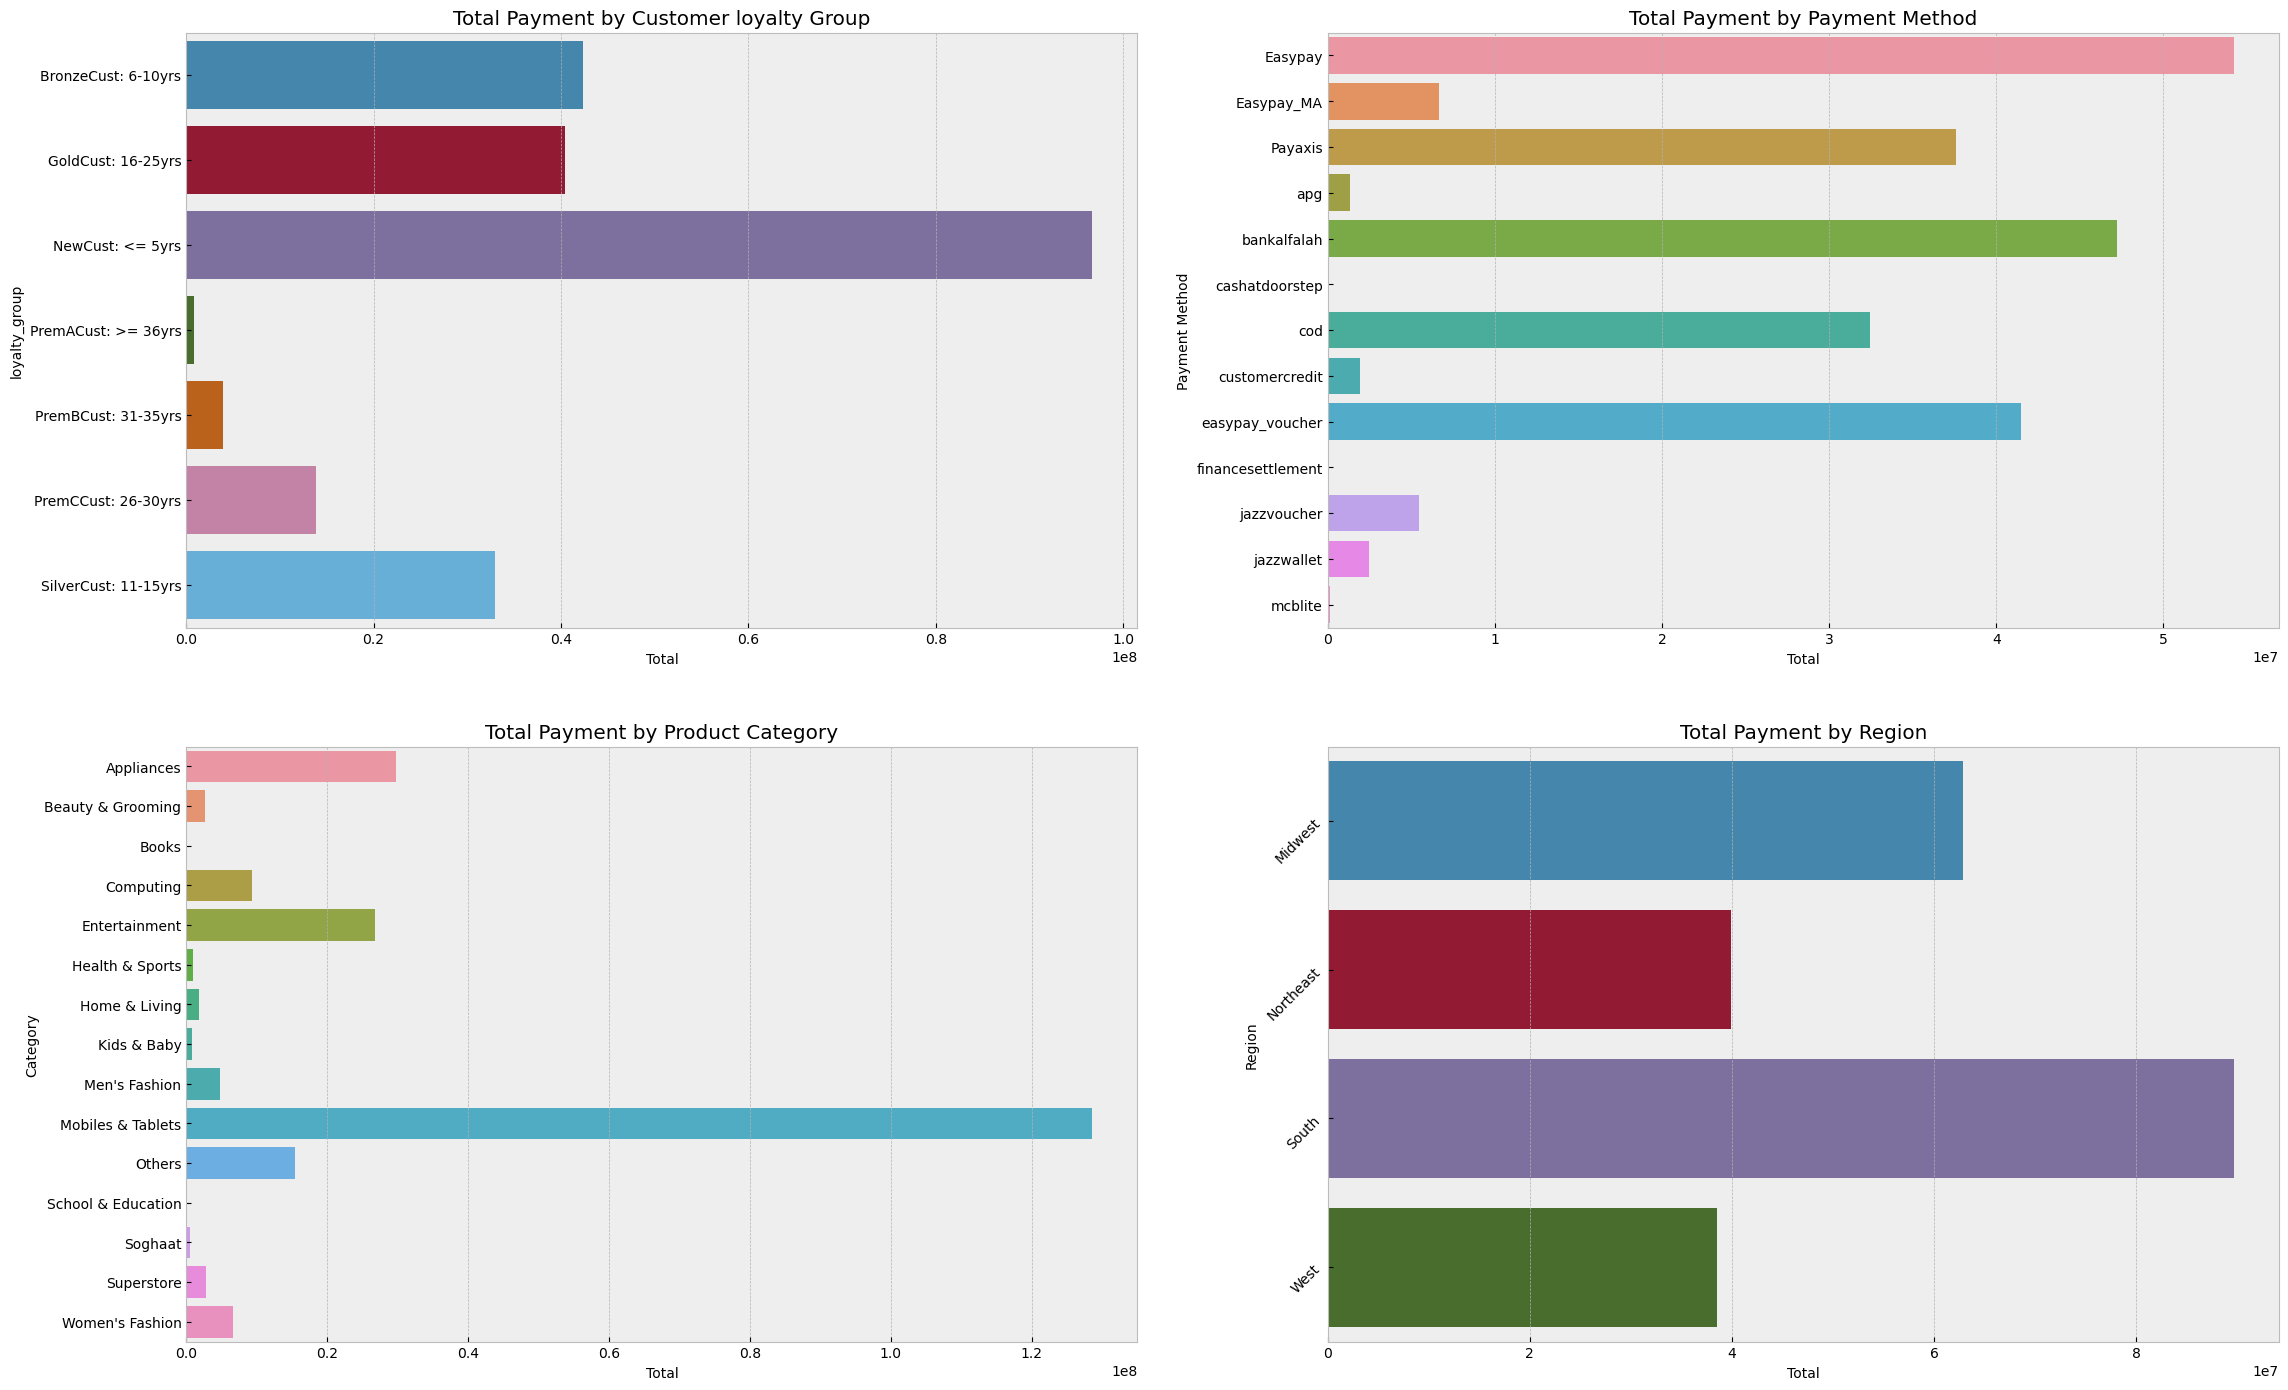

In [313]:
# Total against Categorical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27,17))


   # Total Payment by Customer loyalty Group.
tp_loygrp = data.groupby("loyalty_group")["Total"].sum().reset_index() #groups payment by customer loyalty group
sns.barplot(y='loyalty_group', data =tp_loygrp, x='Total', ax=axs[0,0])
axs[0,0].set_title("Total Payment by Customer loyalty Group")



  #Total Payment by Payment Method
tp_paymed = data.groupby("Payment Method")["Total"].sum().reset_index() 
sns.barplot(y='Payment Method', data =tp_paymed, x='Total', ax=axs[0,1])
axs[0,1].set_title("Total Payment by Payment Method")

   #Total Payment by Product Category 
tp_procat = data.groupby("Category")["Total"].sum().reset_index() 
sns.barplot(y='Category', data =tp_procat, x='Total', ax=axs[1,0])
axs[1,0].set_title("Total Payment by Product Category")

  #Total Payment by Region 
tp_reg = data.groupby("Region")["Total"].sum().reset_index() 
sns.barplot(y='Region', data =tp_reg, x='Total', ax=axs[1,1])
axs[1,1].set_title("Total Payment by Region")
 
plt.yticks(rotation=45) 

tp_loygrp;

# Observation
  - In Box "Total Payment by Customer loyalty Group" , We generated more payment from customers who have been with us
for 5 years or less followed by customers who have been patronizing us between 6 to 10 years. However, customers who 
have stayed with us for more than 36 years made the least total payment.
 - In Box "Total Payment by Payment Method", The highest Total payment was generated through EasyPay followed by bankalfahlah.
 - In Box "Total Payment by Product Category", Mobiles & Tablets sells the most followed by Appliances with Book taking the least spot.
 - In Box "Total Payment by Region", South has the highest payments and West is the least payment region.

####  Focus - Quantity Ordered

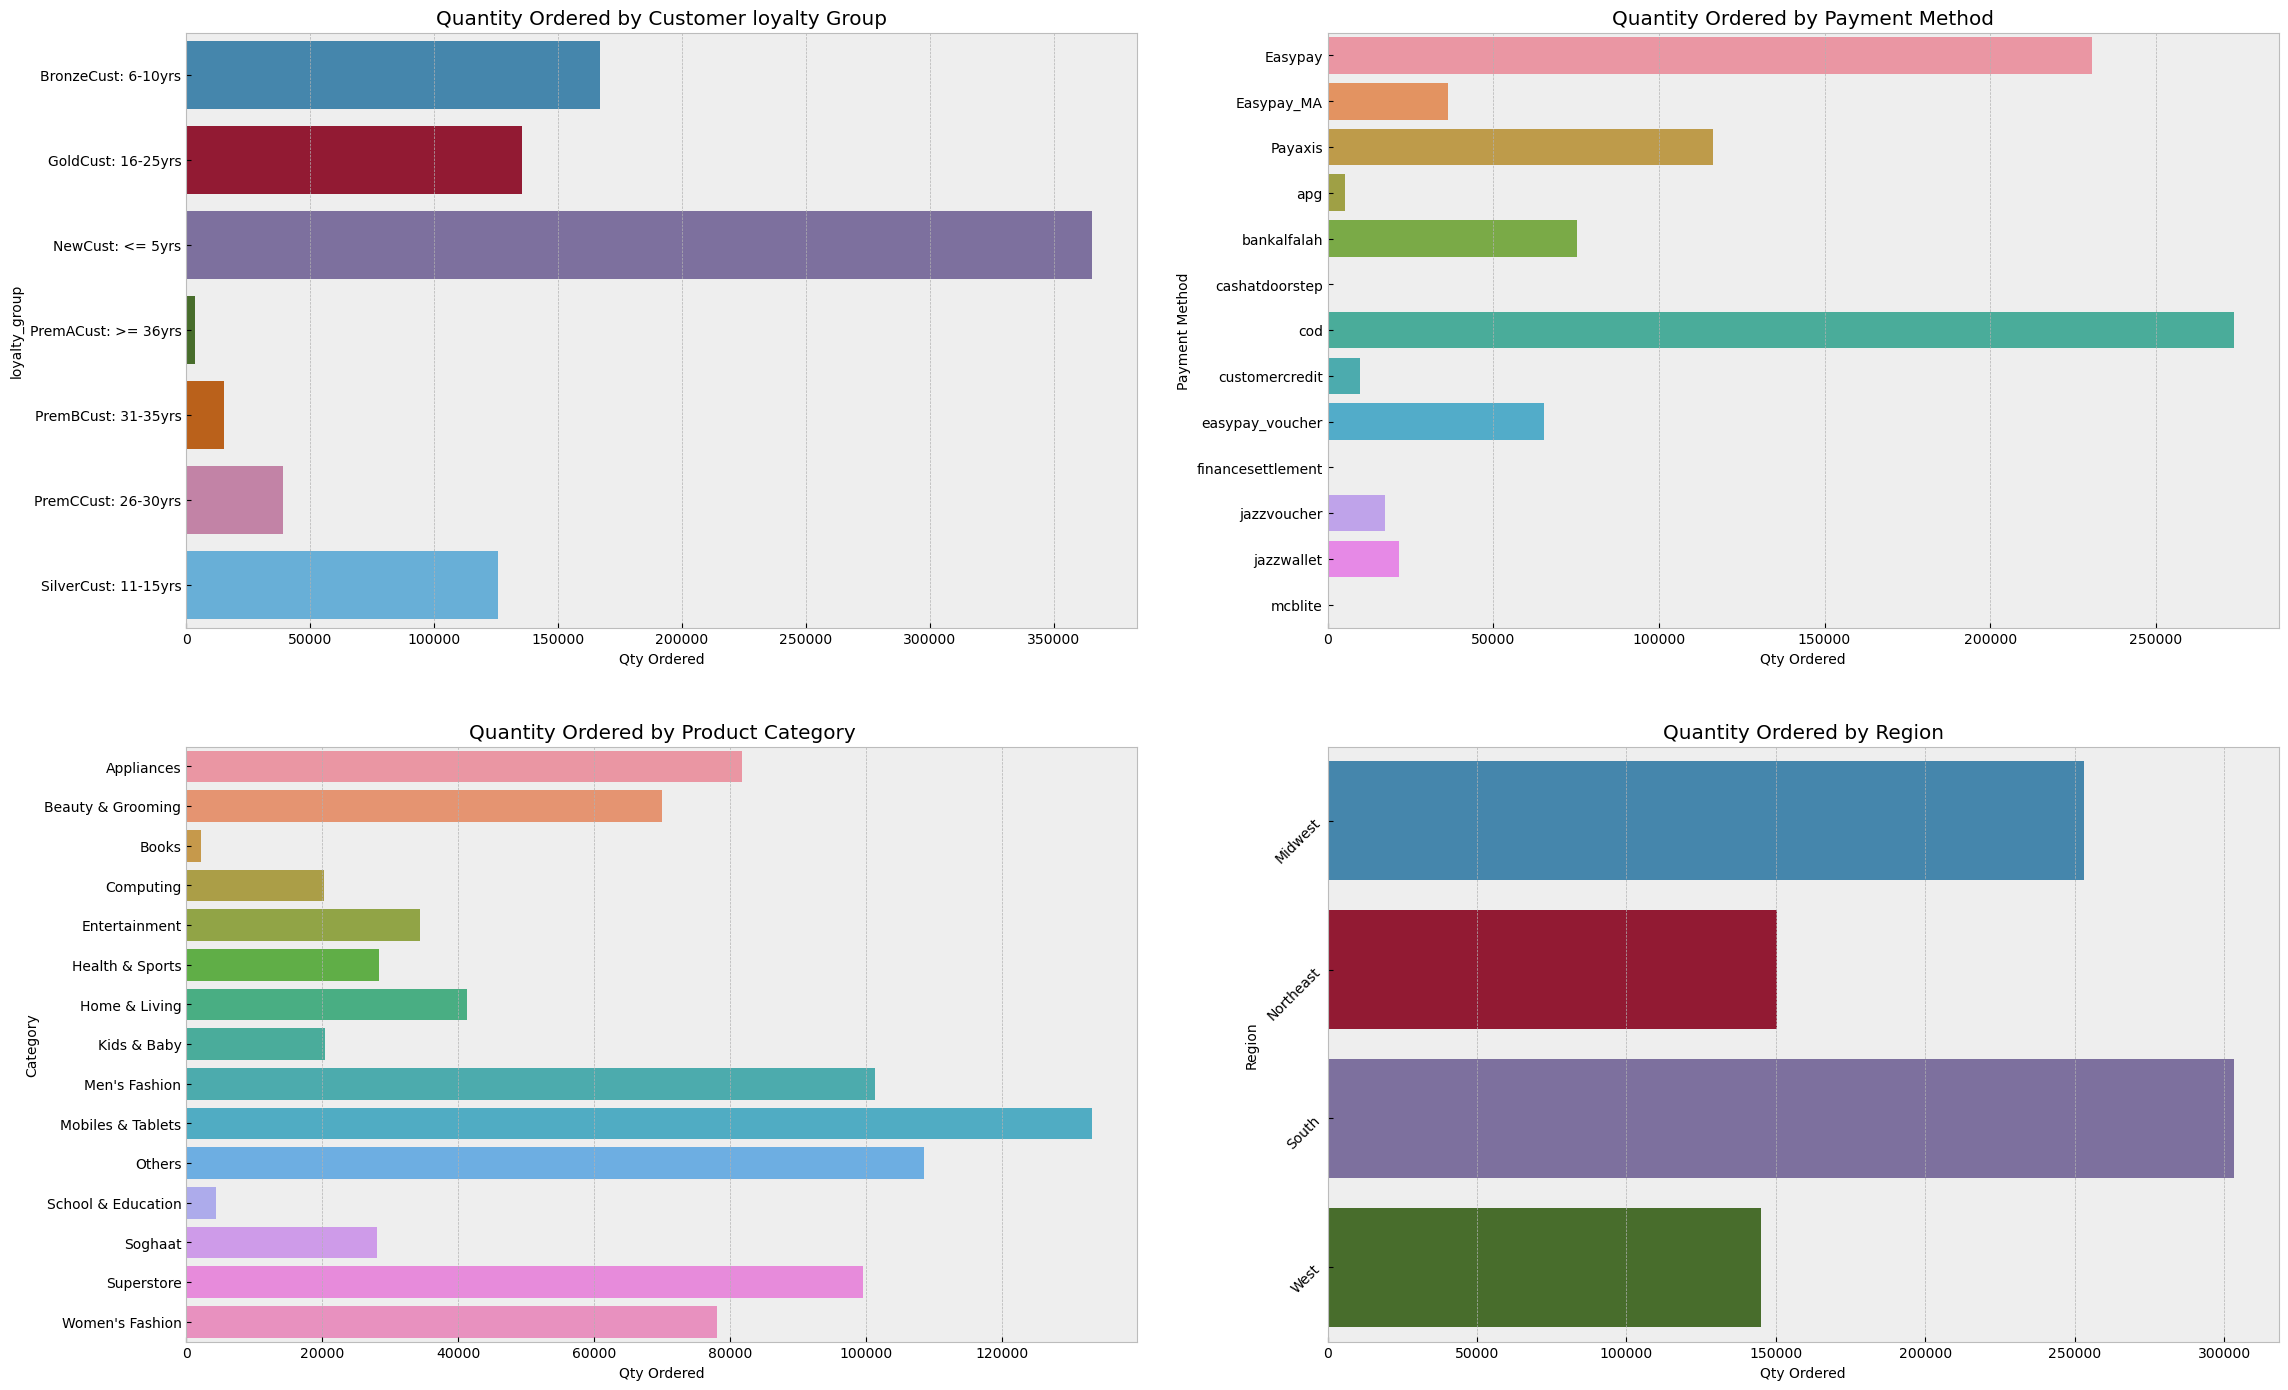

In [312]:
# Quantity Ordered against Categorical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27,17))


   # Quantity Ordered by Customer loyalty Group.
qo_loygrp = data.groupby("loyalty_group")["Qty Ordered"].sum().reset_index() 
sns.barplot(y='loyalty_group', data =qo_loygrp, x='Qty Ordered', ax=axs[0,0])
axs[0,0].set_title("Quantity Ordered by Customer loyalty Group")



  #Quantity Ordered by Payment Method
qo_paymed = data.groupby("Payment Method")["Qty Ordered"].sum().reset_index() 
sns.barplot(y='Payment Method', data =qo_paymed, x='Qty Ordered', ax=axs[0,1])
axs[0,1].set_title("Quantity Ordered by Payment Method")

   #Quantity Ordered by Product Category 
qo_procat = data.groupby("Category")["Qty Ordered"].sum().reset_index() 
sns.barplot(y='Category', data =qo_procat, x='Qty Ordered', ax=axs[1,0])
axs[1,0].set_title("Quantity Ordered by Product Category")

  #Quantity Ordered by Region 
qo_reg = data.groupby("Region")["Qty Ordered"].sum().reset_index() 
sns.barplot(y='Region', data =qo_reg, x='Qty Ordered', ax=axs[1,1])
axs[1,1].set_title("Quantity Ordered by Region")
 
plt.yticks(rotation=45) 

qo_loygrp;

# Observation
  - In Box "Quantity Ordered by Customer loyalty Group" , We generated more orders from customers who have been with us
for 5 years or less followed by customers who have been patronizing us between 6 to 10 years. However, customers who 
have stayed with us for 36 years or more made the least order.
 - In Box "Quantity Ordered by Payment Method", The highest Quantity Ordered was generated through COD followed by EasyPay.
 - In Box "Quantity Ordered by Product Category", Mobiles & Tablets has the most order followed by Others with Book taking the least spot.
 - In Box "Quantity Ordered by Region", South has the highest orders quantity and West is the least payment region.

#### Focus - Total Payment & Quantity Ordered

In [309]:
num_feat.columns

Index(['Cust Id', 'Item Id', 'Order Id', 'Ref Num', 'Zip', 'Qty Ordered',
       'Total', 'first_order_year', 'cust_loyalty'],
      dtype='object')

In [310]:
data.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,first_order_year,cust_loyalty,loyalty_group
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,352808,Midwest,IA,mcrenaud,50519,3,32.0,2008,9,BronzeCust: 6-10yrs
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.8,2005,12,SilverCust: 11-15yrs
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.9,2005,12,SilverCust: 11-15yrs


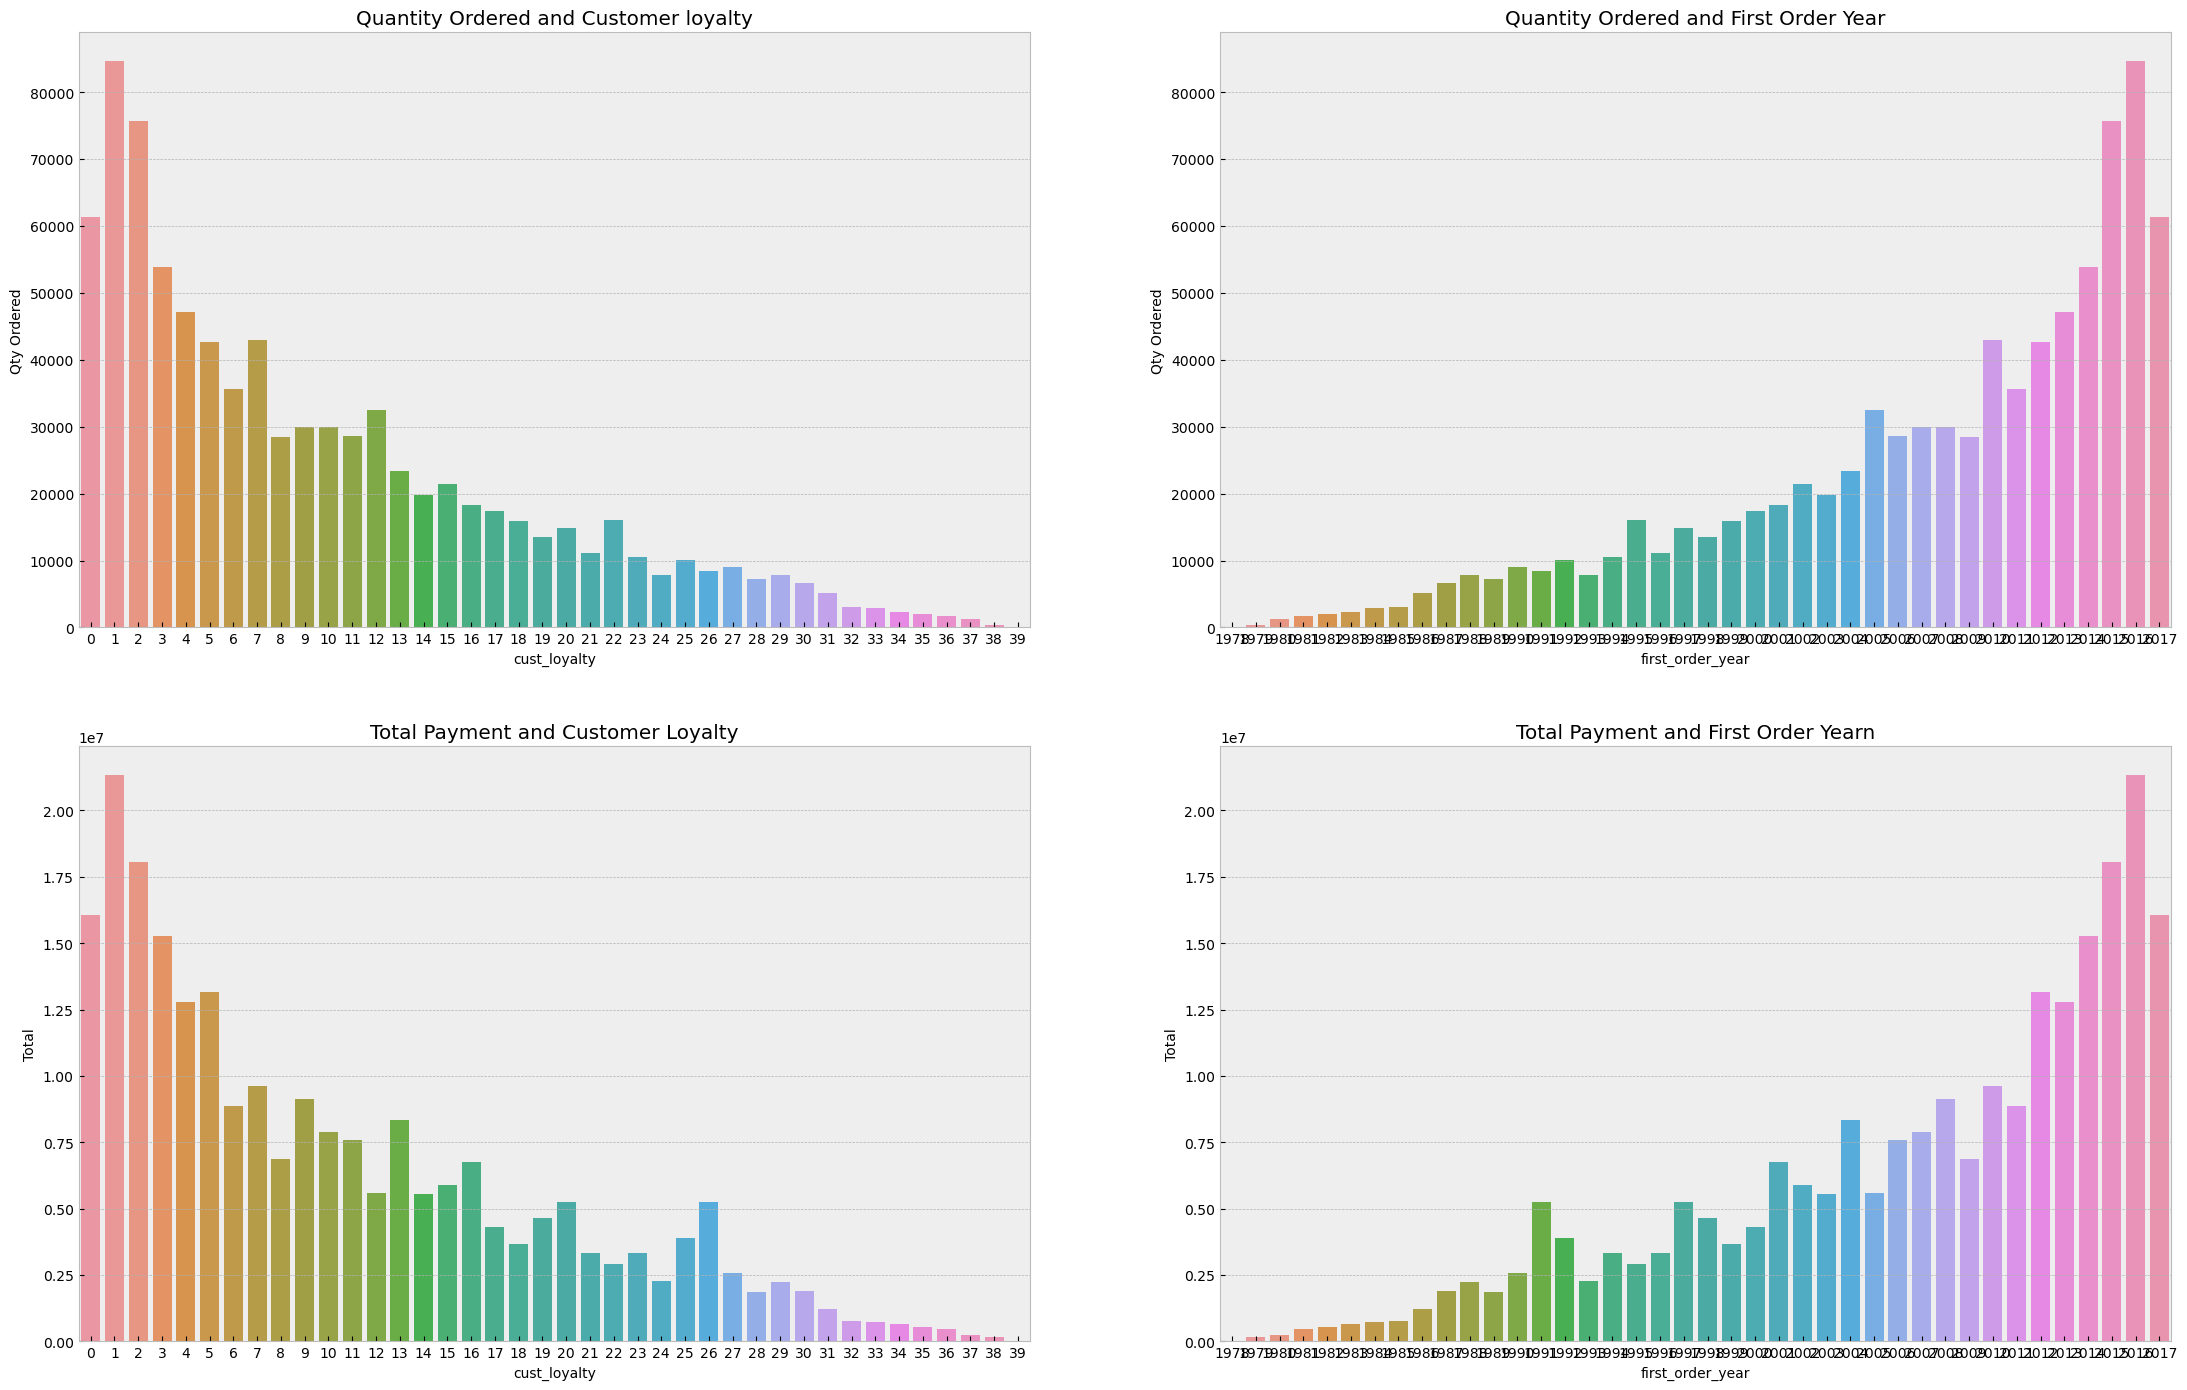

In [311]:
# Quantity Ordered against Numerical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27,17))


   # Quantity Ordered and Customer Loyalty.
qo_custloy = data.groupby("cust_loyalty")["Qty Ordered"].sum().reset_index() 
sns.barplot(x='cust_loyalty', data =qo_custloy, y='Qty Ordered', ax=axs[0,0])
axs[0,0].set_title("Quantity Ordered and Customer loyalty")



  # Quantity Ordered and First Order Year
qo_foy = data.groupby("first_order_year")["Qty Ordered"].sum().reset_index() 
sns.barplot(x='first_order_year', data = qo_foy, y='Qty Ordered', ax=axs[0,1])
axs[0,1].set_title("Quantity Ordered and First Order Year")

   # Total Payment and Customer Loyalty
tp_custloy = data.groupby("cust_loyalty")["Total"].sum().reset_index() 
sns.barplot(x='cust_loyalty', data =tp_custloy, y='Total', ax=axs[1,0])
axs[1,0].set_title("Total Payment and Customer Loyalty")

  # Total Payment and First Order Year
tp_foy = data.groupby("first_order_year")["Total"].sum().reset_index() 
sns.barplot(x='first_order_year', data =tp_foy, y='Total', ax=axs[1,1])
axs[1,1].set_title("Total Payment and First Order Yearn")
 

qo_custloy;

## MULTIVARIATE ANALYSIS OF THE DATA ABOVE

<Axes: >

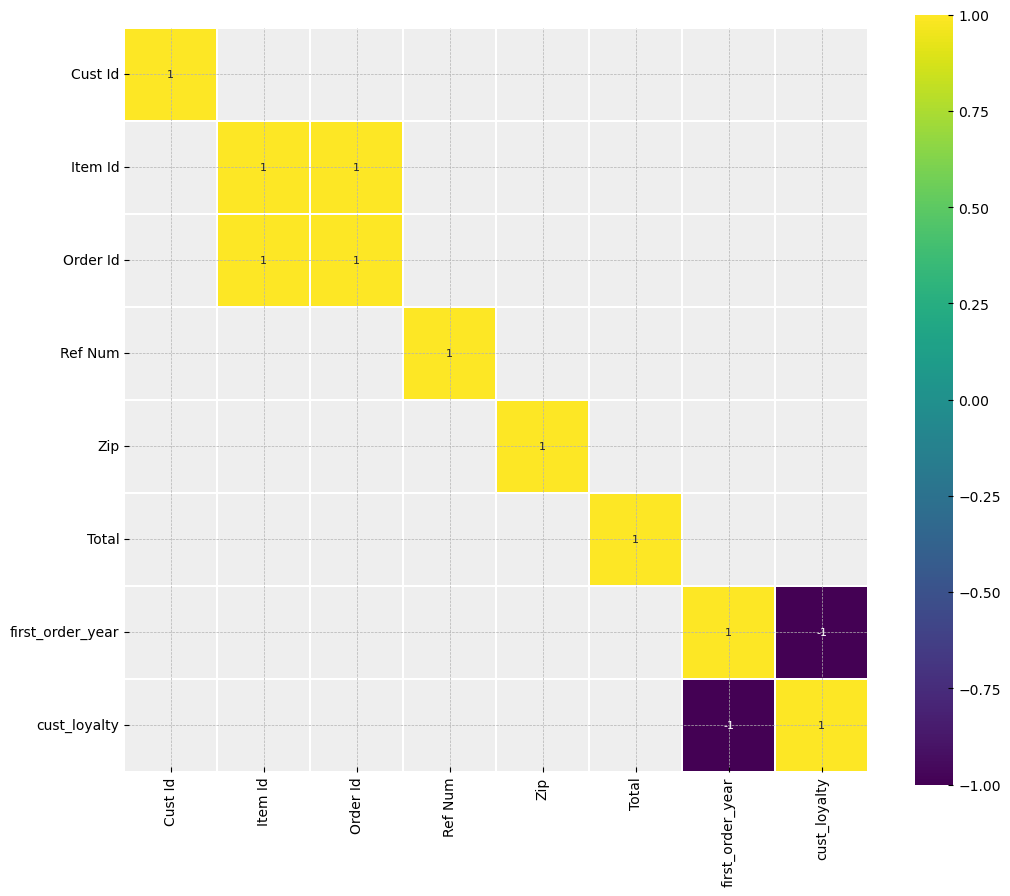

In [315]:
corr = num_feat.drop('Qty Ordered', axis=1).corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

## Observation
The correlation matrix provides valuable insights into relationships between numerical features. Key observations include:

* First Order Year and Customer Loyalty: A strong negative correlation exists between these two variables. This suggests that customers who have been loyal for longer periods tend to have placed their initial orders farther in the past.

* Total Payment and Customer Loyalty: There is a negative correlation, indicating that as customer loyalty duration increases, total payments decrease. This implies that long-term customers might spend less per order.

* Total Payment and First Order Year: The correlation here is positive, suggesting that as the years progress, customers tend to spend more per order.

* Quantity Ordered and Total Payment: These variables don't show a strong correlation. This means that higher quantities ordered don't necessarily lead to higher total payments.

## Recommendations and Future Strategies

Based on the comprehensive analysis of the provided data, several recommendations and future strategies can be formulated to enhance Sterling E-commerce:

* Loyalty Programs: Given the strong correlation between customer loyalty and spending patterns, it's imperative to develop and strengthen customer loyalty programs. Tailor rewards and incentives to different customer segments based on their loyalty duration. For instance, offer special discounts or exclusive deals to long-term customers to maintain their loyalty, referral programs, welcome offers, anniversary rewards for customers who have been with the business for over 10 years.

* Marketing Segmentation: Utilize the insights from regional and categorical analysis to segment marketing efforts. Allocate resources to regions and product categories that generate higher sales. Craft targeted marketing campaigns to attract new customers in regions with lower activity.

* Payment Method Optimization: Given that COD is the most preferred payment method. Consider introducing more user-friendly payment options and promote their advantages, like EasyPay, to encourage customers to adopt them.

* Product Diversification: Expand the product range, especially in categories with lower sales, like Books. Identify emerging trends and introduce products that align with customer preferences.

* Outlier Analysis: Investigate outliers among long-term customers who place exceptionally high orders. These outliers could represent unique customer segments with specific needs. Tailor marketing or loyalty programs to cater to these high-value customers.

* Retention Strategies: Implement strategies to retain customers who have been with the business for 5-10 years, as this is where loyalty starts to decline. Consider personalized communication, surprise rewards, or loyalty tiers.

* Inventory Management: Optimize inventory levels based on the demand patterns observed in the "Total Number of Products" chart. Avoid overstocking in categories with low demand.

* Data Quality: Ensure data quality and completeness, especially in the "Order Id" column, to avoid any issues with future analyses.

* Periodic Analysis: Conduct regular analyses of customer data to track changes in behavior and preferences. Continuously adjust strategies based on evolving customer trends.

These recommendations, when applied strategically, can lead to increased customer loyalty, higher sales, and long-term business growth. It's essential to monitor the effectiveness of these strategies over time and adapt as needed to stay competitive in the market.

